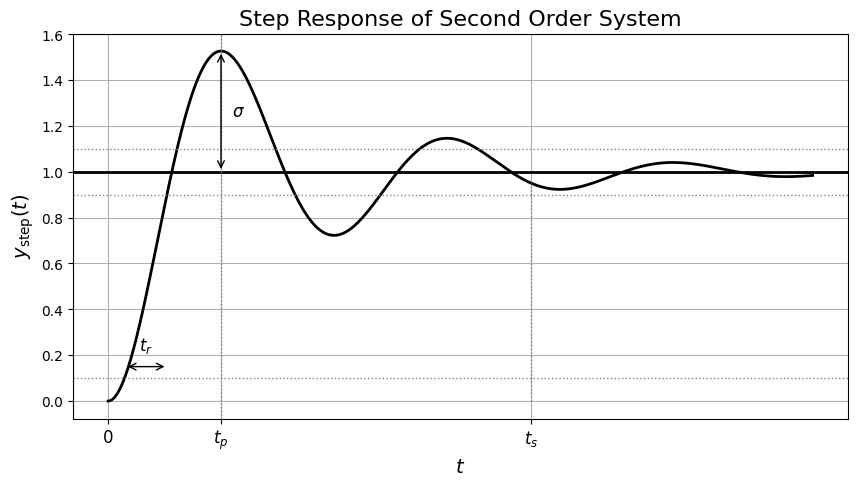

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the step response
xi = 0.2  # Damping ratio
omega_n = 1  # Natural frequency
omega_d = omega_n * np.sqrt(1 - xi**2)  # Damped natural frequency
alpha = np.arctan(np.sqrt(1 - xi**2) / xi)  # Phase shift

# Time vector from 0 to 20
t = np.linspace(0, 20, 1000)

# Step response formula
y_step = 1 - (np.exp(-xi * omega_n * t) / np.sqrt(1 - xi**2)) * np.sin(omega_d * t + alpha)

# Find peak time and overshoot
t_p_index = np.argmax(y_step)
t_p = t[t_p_index]
sigma = y_step[t_p_index] - 1

# Manually set settling time at t_s = 12
t_s = 12

# Find rise time: first points where y_step crosses 0.1 and 0.9
t_r_10_index = np.where(y_step >= 0.1)[0][0]  # First index where y_step >= 0.1
t_r_90_index = np.where(y_step >= 0.9)[0][0]  # First index where y_step >= 0.9
t_r_10 = t[t_r_10_index]
t_r_90 = t[t_r_90_index]

# Find where x=12 intersects the plot
t_s_intersection_index = np.where(t >= t_s)[0][0]
y_t_s = y_step[t_s_intersection_index]

# Plot the step response
plt.figure(figsize=(10, 5))
plt.plot(t, y_step, 'k', linewidth=2)

# Make y=1 line thicker
plt.axhline(1, color='black', linestyle='-', linewidth=2)

# Add reference lines
plt.axhline(0.9, color='gray', linestyle='dotted', linewidth=1)
plt.axhline(0.1, color='gray', linestyle='dotted', linewidth=1)
plt.axvline(t_p, color='gray', linestyle='dotted', linewidth=1)

# Add overshoot annotation (vertical double-headed arrow from y=1 to max)
plt.annotate("", xy=(t_p, 1), xytext=(t_p, y_step[t_p_index]),
             arrowprops=dict(arrowstyle='<->', color='black'), fontsize=12)
plt.text(t_p + 0.3, (1 + y_step[t_p_index]) / 2, r"$\sigma$", fontsize=12, verticalalignment='center')

# Dotted line at x=12 stopping at the plot
plt.plot([t_s, t_s], [0, y_t_s], 'gray', linestyle='dotted', linewidth=1)

# Extend the dotted line at y=1.1 until x=20
plt.axhline(1.1, color='gray', linestyle='dotted', linewidth=1)

# Add rise time arrow (double-headed) and move t_r upwards
plt.annotate("", xy=(t_r_10, 0.15), xytext=(t_r_90, 0.15),
             arrowprops=dict(arrowstyle='<->', color='black'), fontsize=12)
plt.text((t_r_10 + t_r_90) / 2, 0.2, r"$t_r$", fontsize=12, verticalalignment='bottom', horizontalalignment='center')

# Set x-ticks explicitly including t_p and t_s
xticks_values = [0, t_p, t_s]
xtick_labels = [r"$0$", r"$t_p$", r"$t_s$"]
plt.xticks(xticks_values, xtick_labels, fontsize=12)

# Labels and title
plt.xlabel(r"$t$", fontsize=14)
plt.ylabel(r"$y_{\text{step}}(t)$", fontsize=14)
plt.title("Step Response of Second Order System", fontsize=16)
plt.grid(True)
plt.savefig("step_response.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


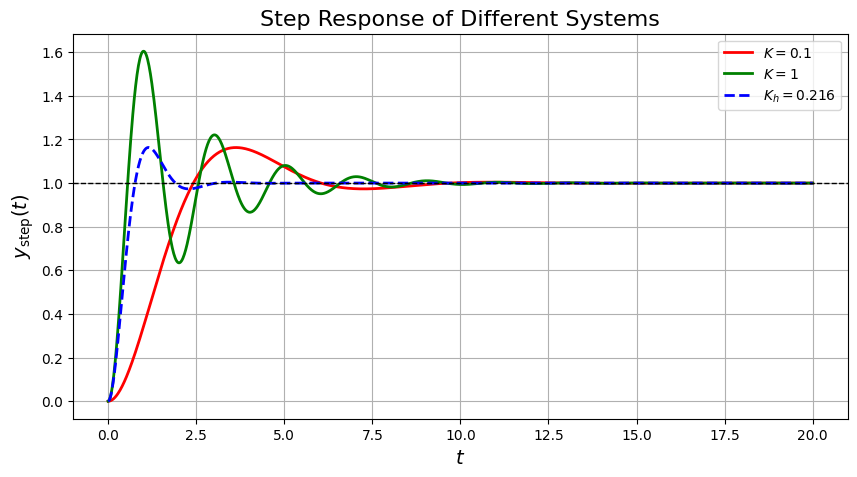

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Time vector from 0 to 20
t = np.linspace(0, 20, 1000)

# Define the step response functions
def step_response_G(K, t):
    """ Step response of G(s) / (1 + G(s)) for given K """
    num = [10 * K]
    den = [1, 1, 10 * K]
    system = ctrl.TransferFunction(num, den)
    _, y = ctrl.step_response(system, t)
    return y

def step_response_H(K_h, t):
    """ Step response of 10 / (s^2 + (1 + 10K_h)s + 10) for given K_h """
    num = [10]
    den = [1, (1 + 10 * K_h), 10]
    system = ctrl.TransferFunction(num, den)
    _, y = ctrl.step_response(system, t)
    return y

# Compute responses
y_K01 = step_response_G(0.1, t)
y_K1 = step_response_G(1, t)
y_Kh = step_response_H(0.216, t)

# Plot responses
plt.figure(figsize=(10, 5))
plt.plot(t, y_K01, 'r', linewidth=2, label=r"$K = 0.1$")
plt.plot(t, y_K1, 'g', linewidth=2, label=r"$K = 1$")
plt.plot(t, y_Kh, 'b', linewidth=2, linestyle='dashed', label=r"$K_h = 0.216$")

# Formatting
plt.axhline(1, color='black', linestyle='--', linewidth=1)  # Reference line at y=1
plt.xlabel(r"$t$", fontsize=14)
plt.ylabel(r"$y_{\text{step}}(t)$", fontsize=14)
plt.title("Step Response of Different Systems", fontsize=16)
plt.legend()
plt.grid(True)
plt.savefig("step_response1.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()


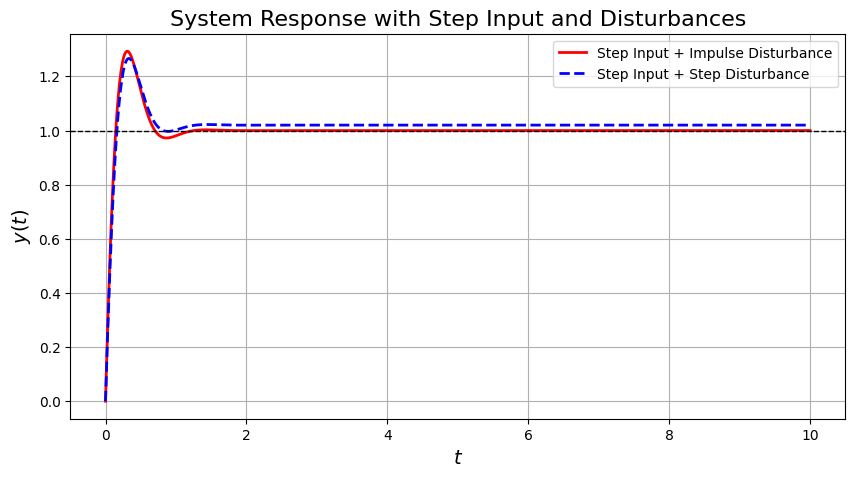

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define the system parameters
K_p = 50
K_d = 8.5

# Define the controller C(s) and plant P(s)
C = K_p + K_d * ctrl.TransferFunction([1, 0], [1])  # PD Controller
P = ctrl.TransferFunction([1], [1, 0, 0])  # Plant: 1/s^2

# Closed-loop transfer function with unity feedback
G_cl = ctrl.feedback(C * P)  # T(s) = C(s)P(s) / (1 + C(s)P(s))

# Define the disturbance transfer function
G_dist = ctrl.feedback(P, C)  # Transfer function from disturbance to output

# Time vector
t = np.linspace(0, 10, 1000)

# Compute the step response to reference input (without disturbance)
t_ref, y_ref = ctrl.step_response(G_cl, t)

# Compute the response to impulse disturbance
t_impulse, y_impulse = ctrl.impulse_response(G_dist, t)

# Compute the response to step disturbance
t_step, y_step_disturbance = ctrl.step_response(G_dist, t)

# Compute the total response (superposition principle)
y_impulse_total = y_ref + y_impulse  # Reference + impulse disturbance
y_step_total = y_ref + y_step_disturbance  # Reference + step disturbance

# Plot responses
plt.figure(figsize=(10, 5))
plt.plot(t, y_impulse_total, 'r', linewidth=2, label="Step Input + Impulse Disturbance")
plt.plot(t, y_step_total, 'b', linewidth=2, linestyle='dashed', label="Step Input + Step Disturbance")

# Formatting
plt.axhline(1, color='black', linestyle='--', linewidth=1)  # Reference line at y=1
plt.xlabel(r"$t$", fontsize=14)
plt.ylabel(r"$y(t)$", fontsize=14)
plt.title("System Response with Step Input and Disturbances", fontsize=16)
plt.legend()
plt.grid(True)
plt.savefig("step_response2.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()


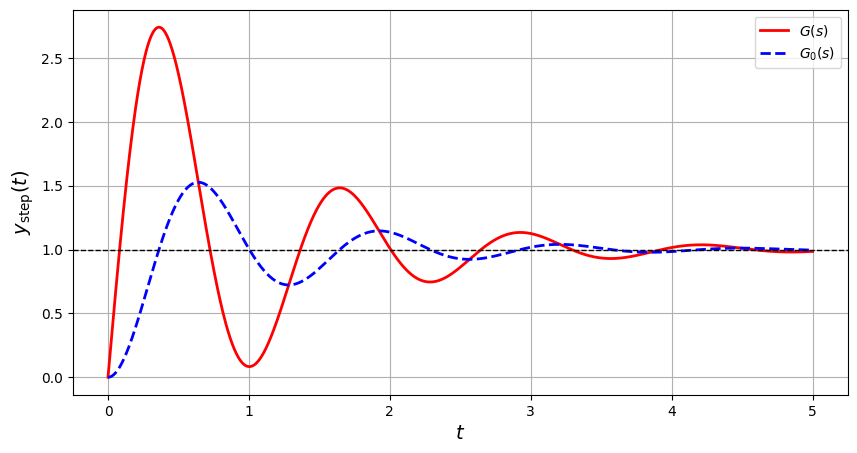

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define system parameters
z = 2  # Zero of G(s)
xi = 0.2  # Damping ratio
omega_n = 5  # Natural frequency

# Define transfer functions
G = ctrl.TransferFunction([1, z], [1, 2 * xi * omega_n, omega_n**2]) * (omega_n**2 / z)
G0 = ctrl.TransferFunction([omega_n**2], [1, 2 * xi * omega_n, omega_n**2])

# Time vector for simulation
t = np.linspace(0, 5, 1000)

# Compute step responses
t_G, y_G = ctrl.step_response(G, t)
t_G0, y_G0 = ctrl.step_response(G0, t)

# Plot responses
plt.figure(figsize=(10, 5))
plt.plot(t_G, y_G, 'r', linewidth=2, label=r"$G(s)$")
plt.plot(t_G0, y_G0, 'b', linewidth=2, linestyle='dashed', label=r"$G_0(s)$")

# Formatting
plt.axhline(1, color='black', linestyle='--', linewidth=1)  # Reference line at y=1
plt.xlabel(r"$t$", fontsize=14)
plt.ylabel(r"$y_{\text{step}}(t)$", fontsize=14)
#plt.title("Step Response of $G(s)$ and $G_0(s)$", fontsize=16)
plt.legend()
plt.grid(True)
plt.savefig("step_PI.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()


C:\Users\Omri\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\pzmap.py:372: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")


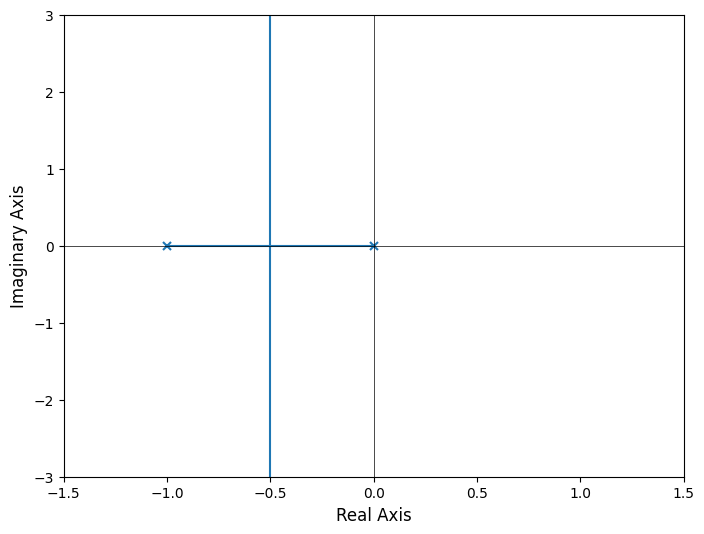

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define system parameters
T = 1  # Time constant
K_p = 2  # Proportional gain
K_i = 1  # Integral gain

# Define the loop-gain transfer function L(s) = k(K_p + K_i) / (s(1 + Ts))
s = ctrl.TransferFunction.s  # Define Laplace variable
L = (K_p + K_i) / (s * (1 + T * s))  # Loop-gain without k
k = ctrl.TransferFunction([1], [1])  # Gain k as a variable multiplier

# Complete loop-gain transfer function with variable k
L_k = k * L

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
ctrl.root_locus(L_k, grid=True, ax=ax)  # Generate root locus on the custom axis

# Set shorter x-axis range
ax.set_xlim([-1.5, 1.5])  # Shorter x-axis range
ax.set_ylim([-3, 3])  # Adjust y-axis if needed

# Manually add axis labels
ax.set_xlabel("Real Axis", fontsize=12)
ax.set_ylabel("Imaginary Axis", fontsize=12)

# Add x and y axis as thin lines
ax.axhline(0, color='black', linewidth=0.5)  # Thin horizontal axis
ax.axvline(0, color='black', linewidth=0.5)  # Thin vertical axis

# Set title
#plt.title(r"Root Locus of $\frac{k(K_p+K_i)}{s(1+Ts)}$", fontsize=14)
plt.savefig("RL_PI_FIXED.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()


In [6]:
ax.set_xlabel("Real Axis", fontsize=12)
ax.set_ylabel("Imaginary Axis", fontsize=12)


Text(28.000000000000007, 0.5, 'Imaginary Axis')

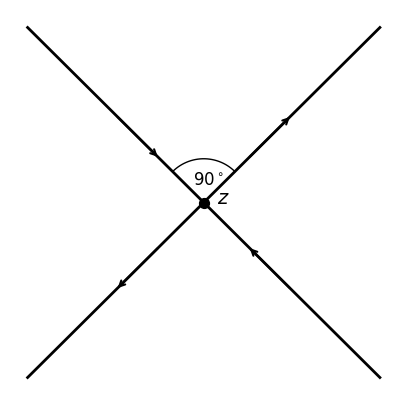

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(5, 5))

# Define asymptotic lines (diagonal branches)
x = np.linspace(-2, 2, 100)
y1 = x  # y = x (45-degree line)
y2 = -x  # y = -x (-45-degree line)

# Plot diagonal branches
ax.plot(x, y1, 'k', linewidth=2)  # Root locus path
ax.plot(x, y2, 'k', linewidth=2)  # Root locus path

# Add arrows to the root locus paths (fixing directions: two inwards, two outwards)
arrow_params_out = dict(arrowstyle="->", color="black", linewidth=1.5)
arrow_params_in = dict(arrowstyle="<-", color="black", linewidth=1.5)

ax.annotate("", xy=(-1, -1), xytext=(-0.5, -0.5), arrowprops=arrow_params_out)  # Bottom-left outwards
ax.annotate("", xy=(1, -1), xytext=(0.5, -0.5), arrowprops=arrow_params_in)   # Bottom-right inwards
ax.annotate("", xy=(-1, 1), xytext=(-0.5, 0.5), arrowprops=arrow_params_in)   # Top-left inwards
ax.annotate("", xy=(1, 1), xytext=(0.5, 0.5), arrowprops=arrow_params_out)   # Top-right outwards

# Add center point with label
ax.scatter(0, 0, color='black', s=50)  # Mark zero
ax.text(0.15, -0.015, r"$z$", fontsize=14)  # Move label "z" to the right and upwards

# Add a correct arc touching both arrows forming 90 degrees
theta = np.linspace(np.pi / 4, np.pi*3 / 4, 30)  # Arc from 45 to 90 degrees
arc_x = 0.5 * np.cos(theta) + 0  # Adjust radius and center of arc
arc_y = 0.5 * np.sin(theta) + 0

ax.plot(arc_x, arc_y, 'k', linewidth=1)  # Draw arc

# Add 90-degree angle annotation
ax.text(-0.12, 0.2, r"$90^\circ$", fontsize=12)

# Remove axis labels, ticks, and frame
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.axis('off')  # Completely remove axes
plt.savefig("RL_lines.png", dpi=300, bbox_inches='tight')
# Show plot
plt.show()


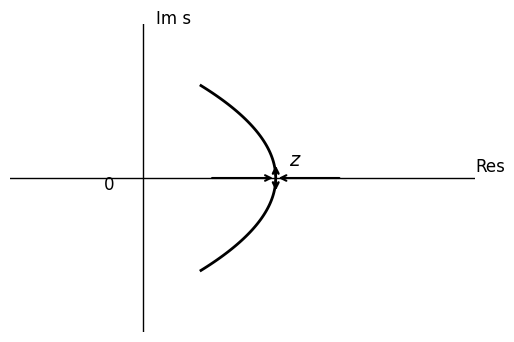

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Draw the x and y axes
ax.axhline(0, color='black', linewidth=1)  # Real axis (Res)
ax.axvline(0, color='black', linewidth=1)  # Imaginary axis (Im s)

# Add labels for axes
ax.text(2.5, 0.1, r"Res", fontsize=12)  # Real axis label
ax.text(0.1, 2.5, r"Im s", fontsize=12)  # Imaginary axis label
ax.text(-0.3, -0.2, r"$0$", fontsize=12)  # Origin label

# Plot the curved root locus branch
t = np.linspace(-1.5, 1.5, 100)
x_curve = 1 + -0.25 * t**2  # Parabolic shape to mimic root locus curvature
y_curve = t

ax.plot(x_curve, y_curve, 'k', linewidth=2)  # Root locus curve

# Add **vertical, short arrows exactly at the intersection, pointing inward**
arrow_params = dict(arrowstyle="<-", color="black", linewidth=1.75)  # Arrow style reversed

# Arrows very close to the real axis, pointing downward and upward
ax.annotate("", xy=(1, 0), xytext=(1, 0.25), arrowprops=arrow_params)  # Short downward arrow
ax.annotate("", xy=(1, -0), xytext=(1, -0.25), arrowprops=arrow_params)  # Short upward arrow

# Add rightwards arrow on the real axis
x_intersect = 1.5  # Intersection point of root locus and real axis
ax.annotate("", xy=(x_intersect - 0.5, 0), xytext=(x_intersect, 0), arrowprops=dict(arrowstyle="->", color="black", linewidth=1.5))

# Add leftwards arrow exactly at the intersection of the root locus and the real axis (corrected direction)
x_intersect = 1  # Intersection point of root locus and real axis
ax.annotate("", xy=(x_intersect - 0.5, 0), xytext=(x_intersect, 0), arrowprops=dict(arrowstyle="<-", color="black", linewidth=1.5))  # Corrected direction

# Add 'z' label near the curve
ax.text(1.1, 0.2, r"$z$", fontsize=14)

# Remove ticks and frame
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Set limits
ax.set_xlim([-1, 2.5])
ax.set_ylim([-2.5, 2.5])
plt.savefig("break_out_point.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()


C:\Users\Omri\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(


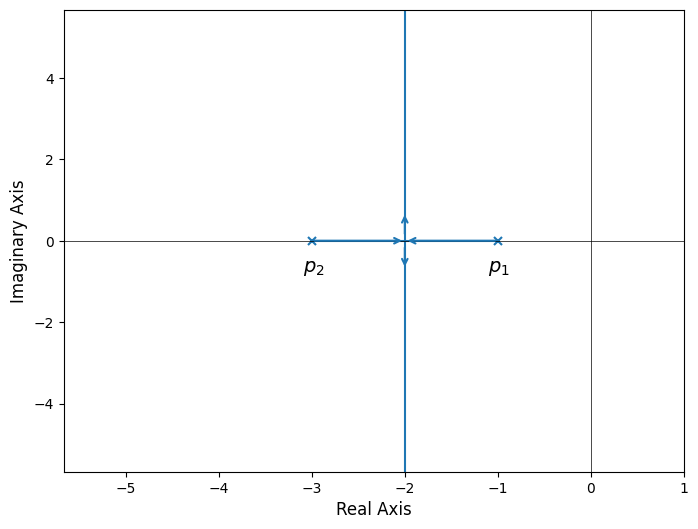

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define system parameters
p1 = -1  # First pole (closer to origin)
p2 = -3  # Second pole (further left)

# Define the transfer function G(s) = 1 / ((s - p1)(s - p2))
s = ctrl.TransferFunction.s  # Define Laplace variable
G = 1 / ((s - p1) * (s - p2))

# Compute the root locus data
rlist, klist = ctrl.root_locus(G, plot=False)

# Compute the breakout point (midpoint of the real axis segment between poles)
breakout_real = (p1 + p2) / 2  # Breakout point on the real axis
breakout_imag = np.sqrt(abs(p1 - p2)) / 2  # Breakout point offset

# Plot the root locus
fig, ax = plt.subplots(figsize=(8, 6))
ctrl.root_locus(G, grid=True, ax=ax)  # Generate root locus on custom axis

root_locus_color = ax.lines[0].get_color()  # Get color of the root locus plot

# Set title and labels
#plt.title(r"Root Locus of $\frac{1}{(s - p_1)(s - p_2)}$", fontsize=14)
ax.set_xlabel("Real Axis", fontsize=12)
ax.set_ylabel("Imaginary Axis", fontsize=12)

# Add x and y axes as thin black lines
ax.axhline(0, color='black', linewidth=0.5)  # Thin horizontal axis
ax.axvline(0, color='black', linewidth=0.5)  # Thin vertical axis

# Draw horizontal arrows from poles to breakout point
arrow_params = dict(arrowstyle="->", color=root_locus_color, linewidth=1.5)
ax.annotate("", xy=(breakout_real, 0), xytext=(p1, 0), arrowprops=arrow_params)  # Arrow from p1 to breakout
ax.annotate("", xy=(breakout_real, 0), xytext=(p2, 0), arrowprops=arrow_params)  # Arrow from p2 to breakout

# Draw vertical arrows from breakout point outwards
ax.annotate("", xy=(breakout_real, breakout_imag), xytext=(breakout_real, 0.1), arrowprops=arrow_params)  # Upward arrow
ax.annotate("", xy=(breakout_real, -breakout_imag), xytext=(breakout_real, -0.1), arrowprops=arrow_params)  # Downward arrow

# Add 'p1' label near the curve
ax.text(-1.1, -0.75, r"$p_1$", fontsize=14)

# Add 'p2' label near the curve
ax.text(-3.1, -0.75, r"$p_2$", fontsize=14)

plt.savefig("RLE1.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()


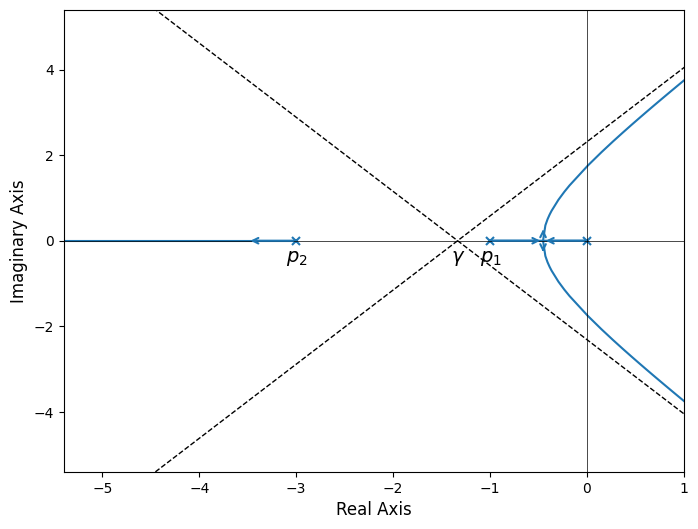

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define system parameters
p1 = -1  # First pole (closer to origin)
p2 = -3  # Second pole (further left)

# Define the transfer function G(s) = 1 / (s (s - p1)(s - p2))
s = ctrl.TransferFunction.s  # Define Laplace variable
G = 1 / (s * (s - p1) * (s - p2))

# Compute the correct breakout point by solving 3x^2 - 2(p1 + p2)x + p1p2 = 0
coeffs = [3, -2 * (p1 + p2), p1 * p2]
roots = np.roots(coeffs)  # Solve for x

# Select the valid breakout point in the range [p1, 0]
breakout_real = roots[(roots >= p1) & (roots <= 0)][0]
breakout_imag = np.sqrt(abs(p1 * p2))  # Breakout point offset

# Compute centroid and asymptote angles
centroid = (0 + p1 + p2) / 3  # Centroid of the asymptotes
asymptote_angles = [60, -60]  # Asymptotes at ±60 degrees

# Define asymptote lines
x_asymptote = np.linspace(centroid - 5, centroid + 5, 100)
y_asymptote1 = np.tan(np.radians(60)) * (x_asymptote - centroid)
y_asymptote2 = np.tan(np.radians(-60)) * (x_asymptote - centroid)

# Plot the root locus
fig, ax = plt.subplots(figsize=(8, 6))
ctrl.root_locus(G, grid=True, ax=ax)  # Generate root locus on custom axis

# Get the root locus color
root_locus_color = ax.lines[0].get_color()  # Extract color

# Set title and labels
#plt.title(r"Root Locus of $\frac{1}{s(s - p_1)(s - p_2)}$", fontsize=14)
ax.set_xlabel("Real Axis", fontsize=12)
ax.set_ylabel("Imaginary Axis", fontsize=12)

# Add x and y axes as thin black lines
ax.axhline(0, color='black', linewidth=0.5)  # Thin horizontal axis
ax.axvline(0, color='black', linewidth=0.5)  # Thin vertical axis

# Plot asymptotes
ax.plot(x_asymptote, y_asymptote1, 'k--', linewidth=1)  # Asymptote at +60 degrees
ax.plot(x_asymptote, y_asymptote2, 'k--', linewidth=1)  # Asymptote at -60 degrees

# Define arrow parameters
arrow_params = dict(arrowstyle="->", color=root_locus_color, linewidth=1.5)

# Draw arrow from the origin to the breakout point
ax.annotate("", xy=(breakout_real, 0), xytext=(0, 0), arrowprops=arrow_params)  # Arrow from origin to breakout

# Draw arrow from p1 to the breakout point
ax.annotate("", xy=(breakout_real, 0), xytext=(p1, 0), arrowprops=arrow_params)  # Arrow from p1 to breakout

# Draw leftward arrow from p2 along the negative real axis
ax.annotate("", xy=(p2 - 0.5, 0), xytext=(p2, 0), arrowprops=arrow_params)  # Leftward arrow from p2

# Draw vertical arrows from breakout point outwards
ax.annotate("", xy=(breakout_real, 0.33), xytext=(breakout_real, 0.1), arrowprops=arrow_params)  # Upward arrow
ax.annotate("", xy=(breakout_real, -0.33), xytext=(breakout_real, -0.1), arrowprops=arrow_params)  # Downward arrow

# Add 'p1' label near the curve
ax.text(-1.1, -0.5, r"$p_1$", fontsize=14)

# Add 'p2' label near the curve
ax.text(-3.1, -0.5, r"$p_2$", fontsize=14)

# Add 'p2' label near the curve
ax.text(-1.4, -0.5, r"$\gamma$", fontsize=14)

plt.savefig("RLE2.png", dpi=300, bbox_inches='tight')


# Show plot
plt.show()


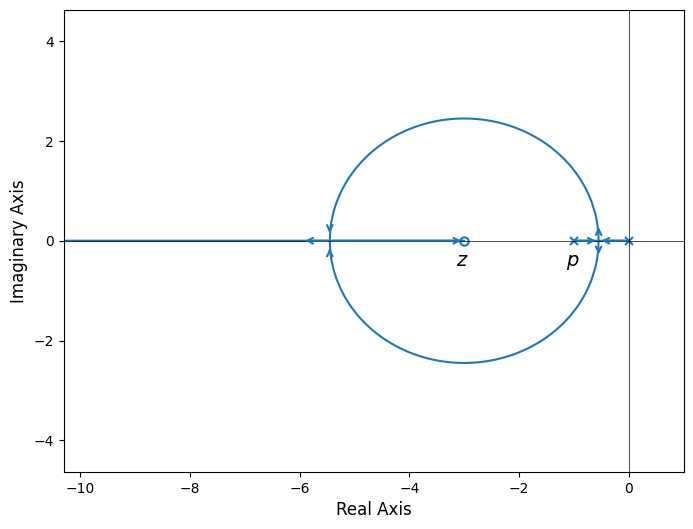

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define system parameters
z = -3  # Zero location
p = -1  # Pole location (closer to origin)

# Define the transfer function G(s) = (s - z) / (s (s - p))
s = ctrl.TransferFunction.s  # Define Laplace variable
G = (s - z) / (s * (s - p))

# Compute the breakout and break-in points explicitly
breakout_real = np.sqrt(6) - 3
breakin_real = -3 - np.sqrt(6)

# Compute the imaginary offset for breakout point (for vertical arrows)
breakout_imag = np.sqrt(abs(p * z)) * 0.5  # Make arrows shorter

# Compute centroid and asymptote angles
centroid = (z + p) / 2  # Centroid of the asymptotes
asymptote_angles = [90]  # Asymptote at 90 degrees

# Define asymptote lines
#x_asymptote = np.full(100, centroid)
#y_asymptote = np.linspace(-5, 5, 100)

# Plot the root locus
fig, ax = plt.subplots(figsize=(8, 6))
ctrl.root_locus(G, grid=True, ax=ax)  # Generate root locus on custom axis

# Get the root locus color
root_locus_color = ax.lines[0].get_color()  # Extract color

# Set title and labels
#plt.title(r"Root Locus of $\frac{s - z}{s(s - p)}$", fontsize=14)
ax.set_xlabel("Real Axis", fontsize=12)
ax.set_ylabel("Imaginary Axis", fontsize=12)

# Add x and y axes as thin black lines
ax.axhline(0, color='black', linewidth=0.5)  # Thin horizontal axis
ax.axvline(0, color='black', linewidth=0.5)  # Thin vertical axis

# Plot asymptotes
#ax.plot(x_asymptote, y_asymptote, 'k--', linewidth=1)  # Asymptote at 90 degrees

# Define arrow parameters
arrow_params = dict(arrowstyle="->", color=root_locus_color, linewidth=1.5)
arrow_params_inward = dict(arrowstyle="->", color=root_locus_color, linewidth=1.5)  # Inward arrows

# Draw horizontal arrows from the origin and from p to the breakout point
ax.annotate("", xy=(breakout_real, 0), xytext=(0, 0), arrowprops=arrow_params)  # From origin to breakout
ax.annotate("", xy=(breakout_real, 0), xytext=(p, 0), arrowprops=arrow_params)  # From p to breakout

# Draw two short vertical arrows from the breakout point outwards
ax.annotate("", xy=(breakout_real, 0.33), xytext=(breakout_real, 0.1), arrowprops=arrow_params)  # Upward arrow
ax.annotate("", xy=(breakout_real, -0.33), xytext=(breakout_real, -0.1), arrowprops=arrow_params)  # Downward arrow

# Draw horizontal arrows from the break-in point: one to z, one towards negative real axis
ax.annotate("", xy=(z, 0), xytext=(breakin_real, 0), arrowprops=arrow_params)  # Break-in point to z
ax.annotate("", xy=(breakin_real - 0.5, 0), xytext=(breakin_real, 0), arrowprops=arrow_params)  # Break-in point to left

# Draw two short vertical inward arrows at the break-in point
ax.annotate("", xy=(breakin_real, 0.1), xytext=(breakin_real, breakout_imag * 0.3), arrowprops=arrow_params_inward)  # Inward down
ax.annotate("", xy=(breakin_real, -0.1), xytext=(breakin_real, -breakout_imag * 0.3), arrowprops=arrow_params_inward)  # Inward up

# Add label for p
ax.text(-1.15, -0.5, r"$p$", fontsize=14)

# Add label for p
ax.text(-3.15, -0.5, r"$z$", fontsize=14)


plt.savefig("RLE3.png", dpi=300, bbox_inches='tight')


# Show plot
plt.show()


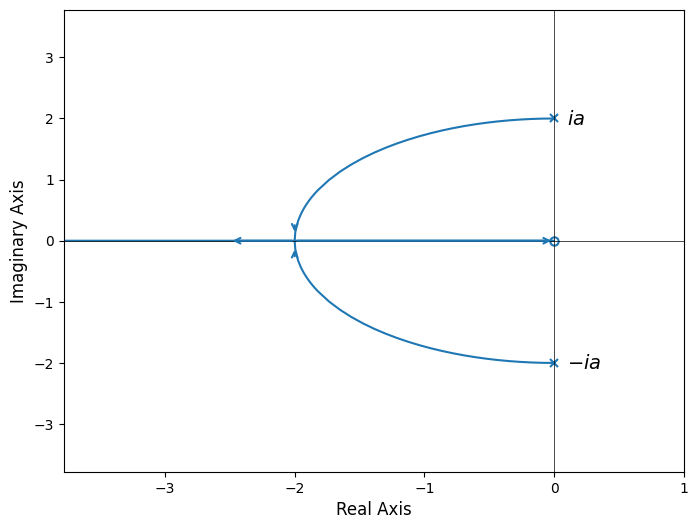

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define system parameters
a = 2  # Value of 'a', with a > 0

# Define the transfer function G(s) = s / (s^2 + a^2)
s = ctrl.TransferFunction.s  # Define Laplace variable
G = s / (s**2 + a**2)

# Compute the breakout and break-in points explicitly
breakout_real = 0  # Breakout point at the origin
breakin_real = -a  # Break-in point at s = -a

# Compute the imaginary offset for breakout point (for vertical arrows)
breakout_imag = a * 0.5  # Make arrows shorter

# Compute centroid and asymptote angles
centroid = -a / 2  # Centroid of the asymptotes
asymptote_angles = [90]  # Asymptote at 90 degrees

# Define asymptote lines
x_asymptote = np.full(100, centroid)
y_asymptote = np.linspace(-5, 5, 100)

# Plot the root locus
fig, ax = plt.subplots(figsize=(8, 6))
ctrl.root_locus(G, grid=True, ax=ax)  # Generate root locus on custom axis

# Get the root locus color
root_locus_color = ax.lines[0].get_color()  # Extract color

# Set title and labels
#plt.title(r"Root Locus of $\frac{s}{s^2 + a^2}$", fontsize=14)
ax.set_xlabel("Real Axis", fontsize=12)
ax.set_ylabel("Imaginary Axis", fontsize=12)

# Add x and y axes as thin black lines
ax.axhline(0, color='black', linewidth=0.5)  # Thin horizontal axis
ax.axvline(0, color='black', linewidth=0.5)  # Thin vertical axis

# Plot asymptotes
#ax.plot(x_asymptote, y_asymptote, 'k--', linewidth=1)  # Asymptote at 90 degrees

# Define arrow parameters
arrow_params = dict(arrowstyle="->", color=root_locus_color, linewidth=1.5)
arrow_params_inward = dict(arrowstyle="->", color=root_locus_color, linewidth=1.5)  # Inward arrows

# Draw horizontal arrows from the origin and from break-in point to breakout point
ax.annotate("", xy=(breakout_real, 0), xytext=(breakin_real, 0), arrowprops=arrow_params)  # From break-in to breakout

# Draw two short vertical arrows from the breakout point outwards
#ax.annotate("", xy=(breakout_real, breakout_imag), xytext=(breakout_real, 0.1), arrowprops=arrow_params)  # Upward arrow
#ax.annotate("", xy=(breakout_real, -breakout_imag), xytext=(breakout_real, -0.1), arrowprops=arrow_params)  # Downward arrow

# Draw horizontal arrows from the break-in point: one towards negative real axis
ax.annotate("", xy=(breakin_real - 0.5, 0), xytext=(breakin_real, 0), arrowprops=arrow_params)  # Break-in point to left

# Draw two short vertical inward arrows at the break-in point
ax.annotate("", xy=(breakin_real, 0.1), xytext=(breakin_real, breakout_imag * 0.3), arrowprops=arrow_params_inward)  # Inward down
ax.annotate("", xy=(breakin_real, -0.1), xytext=(breakin_real, -breakout_imag * 0.3), arrowprops=arrow_params_inward)  # Inward up

# Add label for gamma near the breakout point
ax.text(0.1, 1.9, r"$ia$", fontsize=14)

# Add label for gamma near the breakout point
ax.text(0.1, -2.1, r"$-ia$", fontsize=14)

plt.savefig("RLE4.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()


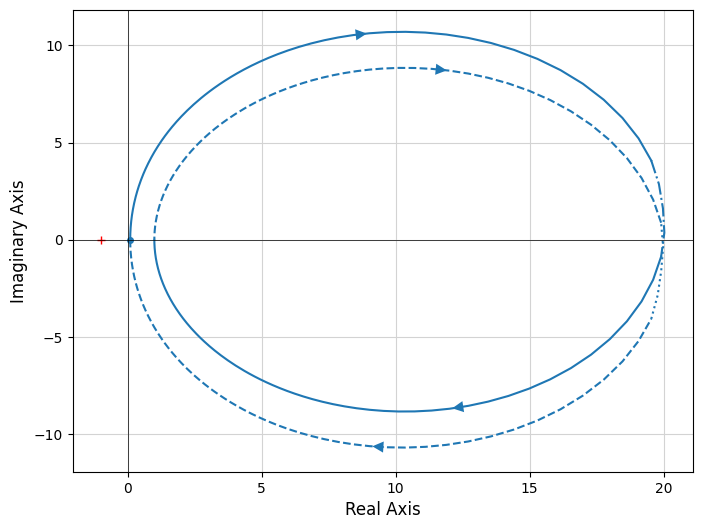

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define the transfer function G(s) = (s^2 + 100.1s + 10) / (s^2 + 5s + 100)
num = [1, 100.1, 10]  # Numerator coefficients
den = [1, 5, 100]  # Denominator coefficients
G = ctrl.TransferFunction(num, den)

# Plot the Nyquist plot
fig, ax = plt.subplots(figsize=(8, 6))
ctrl.nyquist(G, ax=ax, label=r"Nyquist Plot")

# Set title and labels
#plt.title(r"Nyquist Plot of $G(s) = \frac{s^2+100.1s+10}{s^2+5s+100}$", fontsize=14)
ax.set_xlabel("Real Axis", fontsize=12)
ax.set_ylabel("Imaginary Axis", fontsize=12)

# Add x and y axes as thin black lines
ax.axhline(0, color='black', linewidth=0.5)  # Thin horizontal axis (real axis)
ax.axvline(0, color='black', linewidth=0.5)  # Thin vertical axis (imaginary axis)

plt.savefig("nyquist1.png", dpi=300, bbox_inches='tight')


# Show plot
plt.grid(True)
#plt.legend()
plt.show()


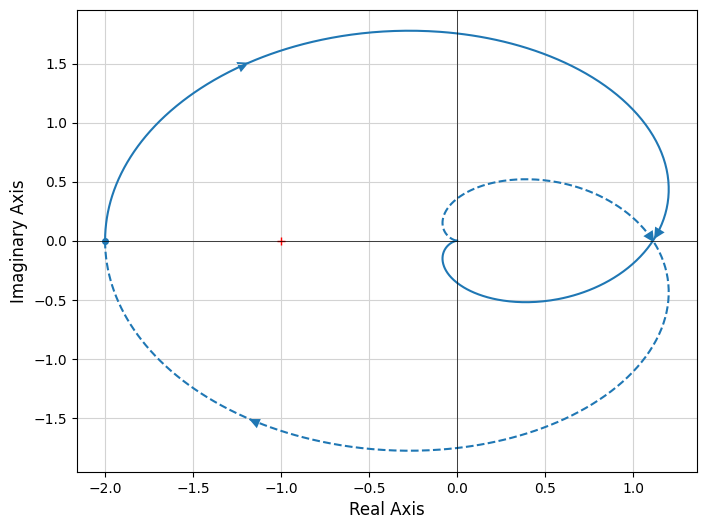

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define the transfer function G(s) = (4(s-1)) / ((s+1)^2(s+2))
num = [4, -4]  # Numerator coefficients (4(s-1) = 4s - 4)
den = [1, 4, 5, 2]  # Denominator coefficients ((s+1)^2(s+2) expanded)
G = ctrl.TransferFunction(num, den)

# Plot the Nyquist plot
fig, ax = plt.subplots(figsize=(8, 6))
ctrl.nyquist(G, ax=ax, label=r"Nyquist Plot")

# Set title and labels
#plt.title(r"Nyquist Plot of $G(s) = \frac{4(s-1)}{(s+1)^2(s+2)}$", fontsize=14)
ax.set_xlabel("Real Axis", fontsize=12)
ax.set_ylabel("Imaginary Axis", fontsize=12)

# Add x and y axes as thin black lines
ax.axhline(0, color='black', linewidth=0.5)  # Thin horizontal axis (real axis)
ax.axvline(0, color='black', linewidth=0.5)  # Thin vertical axis (imaginary axis)

# Show plot
plt.grid(True)

plt.savefig("nyquist1.png", dpi=300, bbox_inches='tight')


#plt.legend()
plt.show()


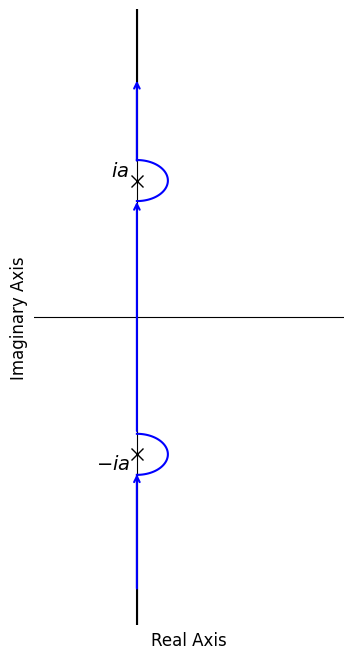

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Create figure and axis
fig, ax = plt.subplots(figsize=(4, 8))

# Set axis limits
ax.set_xlim([-1, 2])
ax.set_ylim([-4.5, 4.5])

# Draw axes
ax.axhline(0, color='black', linewidth=0.8)  # Real axis
ax.axvline(0, color='black', linewidth=0.8)  # Thin vertical axis

# Define poles at ±ia
a = 2  # Example value for 'a'
poles = [1j * a, -1j * a]

# Plot poles
for pole in poles:
    ax.plot(pole.real, pole.imag, 'kx', markersize=8)  # Poles as 'x'

# Draw vertical path along the imaginary axis (excluding semicircle regions)
imaginary_path_y_top = np.linspace(a + 0.3, 4.5, 50)
imaginary_path_y_bottom = np.linspace(-4.5, -a - 0.3, 50)
ax.plot(np.zeros_like(imaginary_path_y_top), imaginary_path_y_top, 'k', linewidth=1.5)  # Upper part of axis
ax.plot(np.zeros_like(imaginary_path_y_bottom), imaginary_path_y_bottom, 'k', linewidth=1.5)  # Lower part of axis

# Draw vertical semicircular curves around poles (from 0 to π)
theta = np.linspace(0, np.pi, 50)  # Vertical semicircle

arc_radius = 0.3  # Radius of arcs around poles

# Upper arc around +ia
upper_arc_x = arc_radius * np.sin(theta)
upper_arc_y = a + arc_radius * np.cos(theta)
ax.plot(upper_arc_x, upper_arc_y, 'b', linewidth=1.5)

# Lower arc around -ia
lower_arc_x = arc_radius * np.sin(theta)
lower_arc_y = -a + arc_radius * np.cos(theta)
ax.plot(lower_arc_x, lower_arc_y, 'b', linewidth=1.5)

# Draw arrows with specific placements (excluding semicircle areas) in blue
arrow_params = dict(arrowstyle="->", color='blue', linewidth=1.5)

# First arrow: from -2.7 upwards to 2.7
ax.annotate("", xy=(0, 1.73), xytext=(0, -1.7), arrowprops=arrow_params)

# Second arrow: from 3.2 upwards
ax.annotate("", xy=(0, 3.5), xytext=(0, 2.25), arrowprops=arrow_params)

# Third arrow: from -4 upwards to -3.2
ax.annotate("", xy=(0, -2.25), xytext=(0, -4), arrowprops=arrow_params)

# Add labels
ax.text(-0.25, a, r"$ia$", fontsize=14, verticalalignment='bottom')
ax.text(-0.4, -a, r"$-ia$", fontsize=14, verticalalignment='top')
#ax.text(1, 1.5, r"the curve $\Omega$", fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# Hide ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.set_xlabel("Real Axis", fontsize=12)
ax.set_ylabel("Imaginary Axis", fontsize=12)
# Show plot

plt.savefig("omega_curve.png", dpi=300, bbox_inches='tight')


plt.show()


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


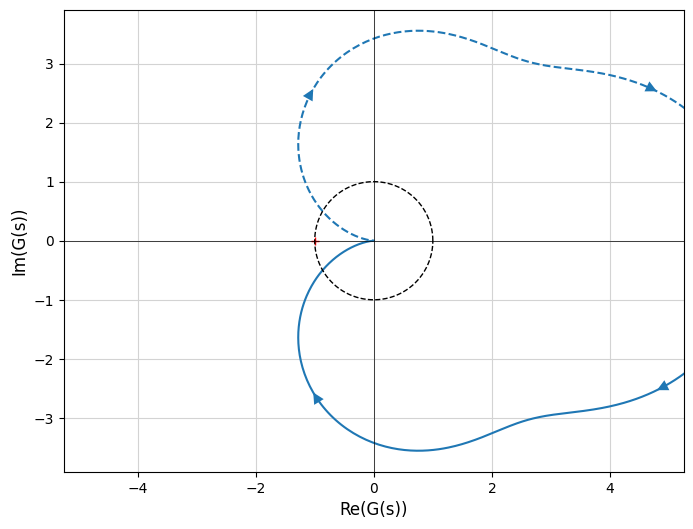

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define the original transfer function G(s) = 4(s + 0.8) / ((s^2 + 1.5s + 2)(s + 0.5))
num = [4, 3.2]  # Numerator: 4(s + 0.8) expanded to 4s + 3.2
den = [1, 2.0, 3.5, 1]  # Denominator: (s^2 + 1.5s + 2)(s + 0.5) expanded

G = ctrl.TransferFunction(num, den)

# Define the scaled transfer function kG(s) with k = 2
k = 2  # Scaling factor
G_k = k * G  # Multiply the transfer function by k

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the Nyquist plot of kG(s)
ctrl.nyquist(G_k, ax=ax)

# Set title and labels
#plt.title(r"Nyquist Plot of $2G(s)$ with Unit Circle", fontsize=14)
ax.set_xlabel("Re(G(s))", fontsize=12)
ax.set_ylabel("Im(G(s))", fontsize=12)

# Set x-axis limits from -2 to 2
ax.set_xlim([-2, 2])

# Ensure equal aspect ratio
ax.set_aspect('equal', adjustable='datalim')

# Add x and y axes as thin black lines
ax.axhline(0, color='black', linewidth=0.5)  # Thin horizontal axis (real axis)
ax.axvline(0, color='black', linewidth=0.5)  # Thin vertical axis (imaginary axis)

# Plot unit circle with dotted line
theta = np.linspace(0, 2 * np.pi, 300)  # Full circle
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)
ax.plot(unit_circle_x, unit_circle_y, 'k--', linewidth=1, label="Unit Circle")  # Dotted unit circle

# Show plot with grid and legend
plt.grid(True)
#plt.legend()
plt.savefig("nyquist_pm.png", dpi=300, bbox_inches='tight')

plt.show()


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


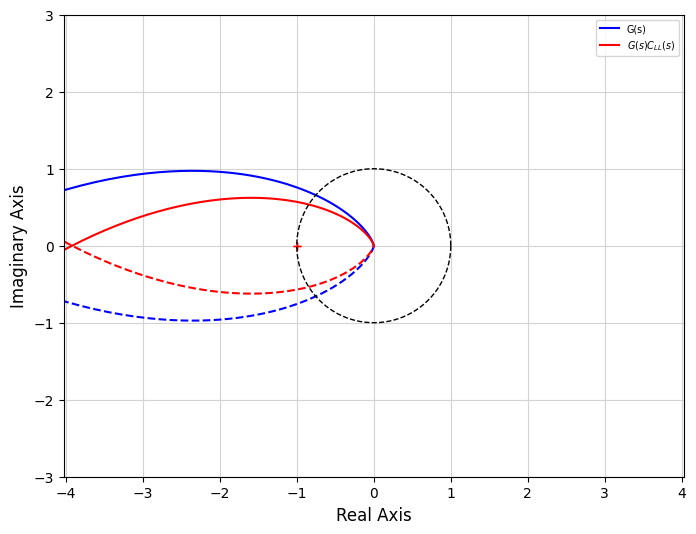

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define the first transfer function G(s) = (100 / (s + 5)^2) * (82 / (s + 7))
K1 = 100
K2 = 82
omega_c1 = 5  # Break frequency for squared term
omega_c2 = 7  # Additional pole

num_G = [K1 * K2]  # Numerator: Constant gain
den_G = np.polymul([1, 2 * omega_c1, omega_c1**2], [1, omega_c2])  # Denominator: (s + 5)^2 * (s + 7)

G = ctrl.TransferFunction(num_G, den_G)

# Define the second transfer function H(s) = 337(s + 5.773) / [(s + 5)^2 (s + 19.48)] * (82 / (s + 7))
K3 = 337
z1 = 5.773
p1 = 19.48

num_H = np.polymul([K3, K3 * z1], [K2])  # Numerator: 337(s + 5.773) * (82)
den_H = np.polymul([1, p1], np.polymul([1, 2 * omega_c1, omega_c1**2], [1, omega_c2]))  # Denominator: (s + 5)^2 * (s + 19.48) * (s + 7)

H = ctrl.TransferFunction(num_H, den_H)

# Create figure for Nyquist plot
fig, ax = plt.subplots(figsize=(8, 6))

# Nyquist plot for G(s)
ctrl.nyquist_plot(G, omega=np.logspace(-1, 3, 500), ax=ax, color='b', label="G(s)")

# Nyquist plot for H(s)
ctrl.nyquist_plot(H, omega=np.logspace(-1, 3, 500), ax=ax, color='r', label="$G(s)C_{LL}(s)$")

# Zoom in on the origin
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

# Ensure equal aspect ratio to prevent vertical squeezing
ax.set_aspect('equal', adjustable='datalim')

# Add unit circle (dotted)
theta = np.linspace(0, 2*np.pi, 300)  # Generate angle values
unit_circle_x = np.cos(theta)
unit_circle_y = np.sin(theta)
ax.plot(unit_circle_x, unit_circle_y, 'k--', linewidth=1, label="Unit Circle")

# Add grid and labels
#plt.title("Zoomed-In Nyquist Plot of G(s) and H(s) with Unit Circle")
ax.set_xlabel("Real Axis", fontsize=12)
ax.set_ylabel("Imaginary Axis", fontsize=12)
plt.grid(True)

plt.savefig("nyquist_cll.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()


C:\Users\Omri\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\pzmap.py:372: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")


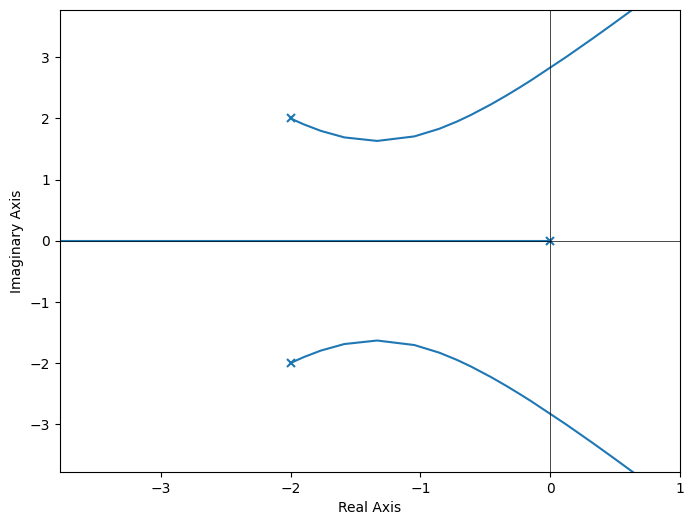

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function: k / (s(s^2 + 4s + 8))
num = [1]  # Numerator (just k)
den = [1, 4, 8, 0]  # Denominator (s(s^2 + 4s + 8))

# Create the transfer function
G = ctl.tf(num, den)

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the root locus
ctl.rlocus(G, grid=True, ax=ax)  # Pass ax to control where the plot goes

# Remove the automatically generated title
ax.set_title("")  # This removes the auto-generated title

# Customize axis labels and grid
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(False)

plt.savefig("RL_rec5_ex1", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


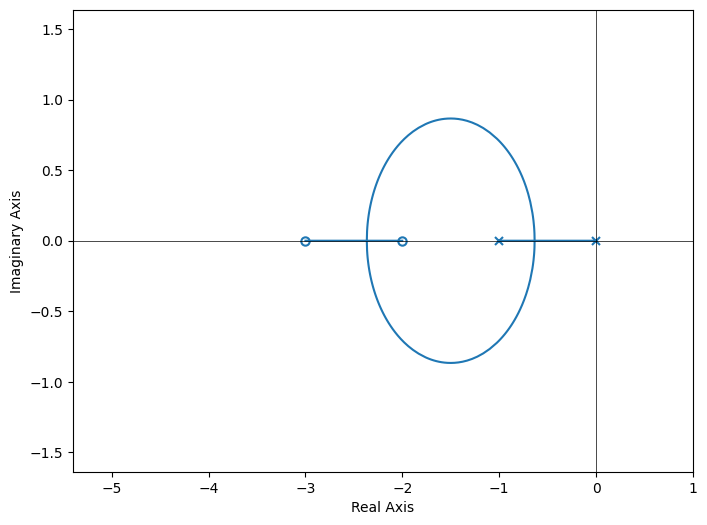

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = (s+2)(s+3) / (s(s+1))
num = np.polymul([1, 2], [1, 3])  # (s+2)(s+3)
den = np.polymul([1, 0], [1, 1])  # s(s+1)

# Create the transfer function
G = ctl.tf(num, den)

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the root locus
ctl.rlocus(G, grid=True, ax=ax)  # Pass ax to control where the plot goes

# Remove the automatically generated title
ax.set_title("")  # This removes the auto-generated title

# Customize axis labels and grid
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(False)

plt.savefig("RL_rec5_ex2", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


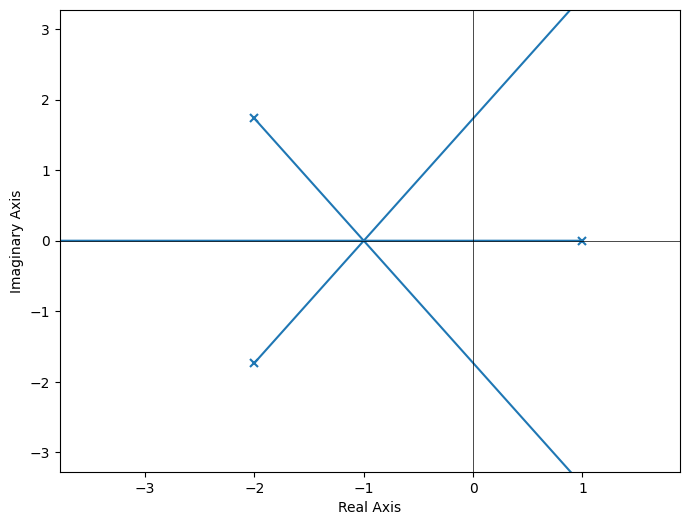

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = (s+2)(s+3) / (s(s+1))
num = [1]  # (s+2)(s+3)
den = [1, 3, 3, -7]  # s(s+1)

# Create the transfer function
G = ctl.tf(num, den)

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the root locus
ctl.rlocus(G, grid=True, ax=ax)  # Pass ax to control where the plot goes

# Remove the automatically generated title
ax.set_title("")  # This removes the auto-generated title

# Customize axis labels and grid
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(False)

plt.savefig("RL_rec5_ex3", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


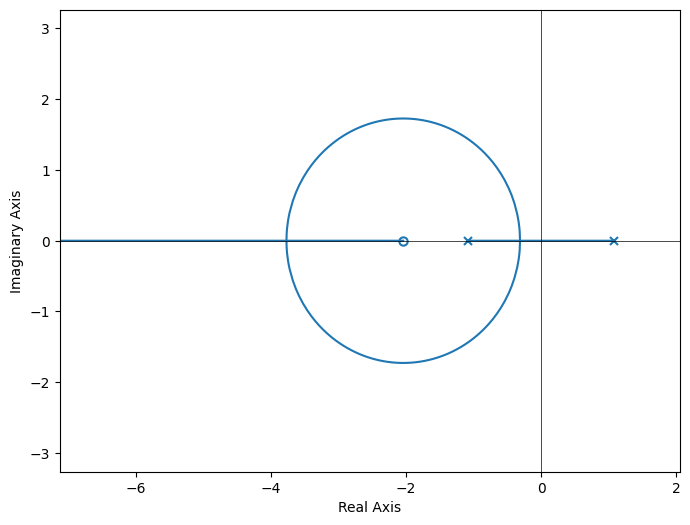

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = (s+2)(s+3) / (s(s+1))
num = [0.49, 0.49 * 2.04]  # 0.49 * (s + 2.04)
den = [10000, 0, -10000 * 1.1772]  # 10000 * (s^2 - 1.1772)

# Create the transfer function
G = ctl.tf(num, den)

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the root locus
ctl.rlocus(G, grid=True, ax=ax)  # Pass ax to control where the plot goes

# Remove the automatically generated title
ax.set_title("")  # This removes the auto-generated title

# Customize axis labels and grid
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(False)

plt.savefig("RL_rec5_ex4", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


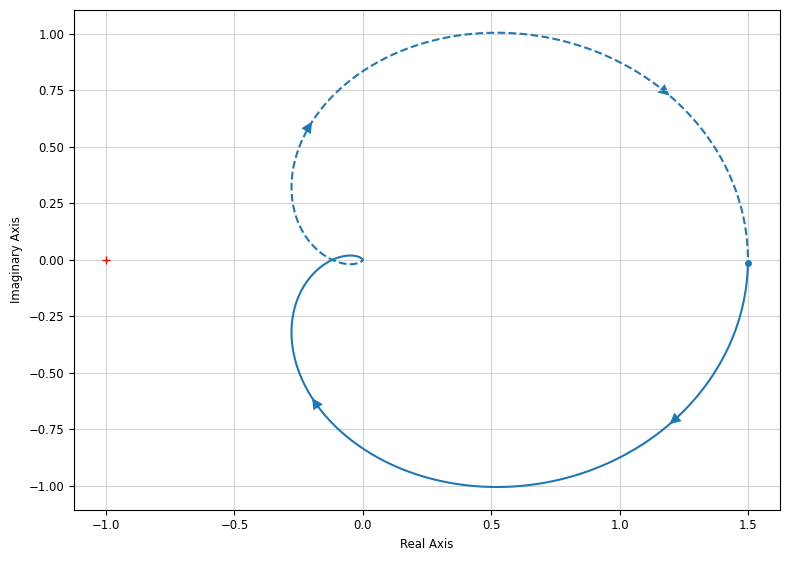

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = 150 / ((s+2)(s+5)(s+10))
num = [150]  # Numerator coefficients
den = np.polymul([1, 2], np.polymul([1, 5], [1, 10]))  # Denominator coefficients

# Create the transfer function
G = ctl.tf(num, den)

# Create a Nyquist plot
plt.figure(figsize=(8, 6))
ctl.nyquist(G, omega=np.logspace(-2, 2, 1000))

# Remove the auto-generated title
plt.suptitle("")  # Removes the figure's main title

# Custom plot title
#plt.title("Nyquist Plot of $\\frac{150}{(s+2)(s+5)(s+10)}$")
plt.xlabel("Real Axis")
plt.ylabel("Imaginary Axis")
plt.grid(True)

plt.savefig("r6_ex1", dpi=300, bbox_inches='tight')


plt.show()


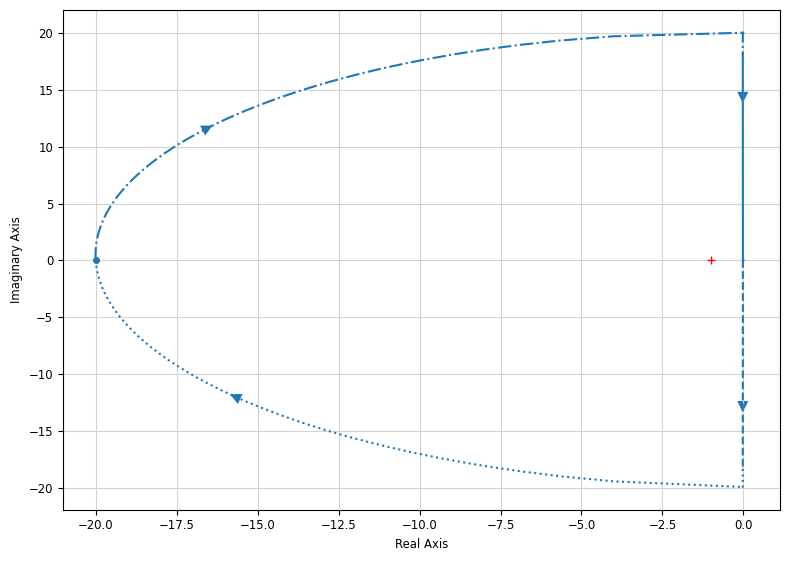

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = (s+1) / (s(s+3)(s+10))
num = [-1, -1]  # (s+1) -> Coefficients of numerator
den = np.polymul([1, 0], np.polymul([1, 3], [1, 10]))  # s(s+3)(s+10)

# Create transfer function
G = ctl.tf(num, den)

# Create Nyquist plot
plt.figure(figsize=(8, 6))
ctl.nyquist(G)

# Remove automatic title
plt.suptitle("")  # Removes figure-level title

# Custom labels
plt.xlabel("Real Axis")
plt.ylabel("Imaginary Axis")
plt.grid(True)
plt.savefig("r6_ex3", dpi=300, bbox_inches='tight')

plt.show()


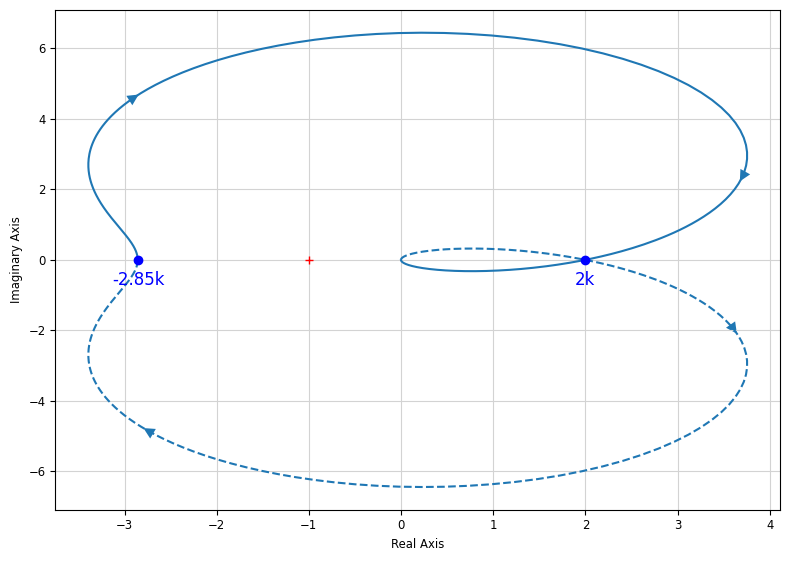

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = 8(s-25) / (s^2 + 4s + 70)
num = [8, -200]  # (8s - 200)
den = [1, 4, 70]  # (s^2 + 4s + 70)

# Create transfer function
G = ctl.tf(num, den)

# Create Nyquist plot
plt.figure(figsize=(8, 6))
ctl.nyquist(G)

# Remove automatic title
plt.suptitle("")  # Removes figure-level title

# Custom axis labels
plt.xlabel("Real Axis")
plt.ylabel("Imaginary Axis")

# Mark points where the Nyquist plot crosses the real axis
real_crossings = [2, -2.85]  # Real-axis intersection points
imag_values = [0, 0]  # These are on the real axis

# Plot and label the intersection points
plt.scatter(real_crossings, imag_values, color='blue', zorder=3)
for x, y in zip(real_crossings, imag_values):
    plt.text(x, y - 0.7, f"{x}k", fontsize=12, ha='center', color='blue')  # Adjust position below x-axis

# Enable grid
plt.grid(True)
plt.savefig("r6_ex4_v1", dpi=300, bbox_inches='tight')
plt.show()


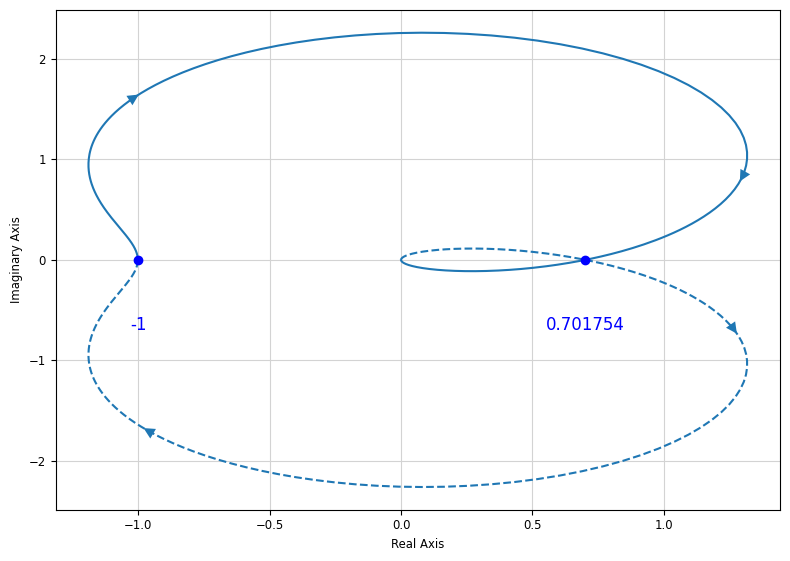

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = 8(s-25) / (s^2 + 4s + 70)
num = [2.807, -70.1754]  # (8s - 200)
den = [1, 4, 70]  # (s^2 + 4s + 70)

# Create transfer function
G = ctl.tf(num, den)

# Create Nyquist plot
plt.figure(figsize=(8, 6))
ctl.nyquist(G)

# Remove automatic title
plt.suptitle("")  # Removes figure-level title

# Custom axis labels
plt.xlabel("Real Axis")
plt.ylabel("Imaginary Axis")

# Mark points where the Nyquist plot crosses the real axis
real_crossings = [0.701754, -1]  # Real-axis intersection points
imag_values = [0, 0]  # These are on the real axis

# Plot and label the intersection points
plt.scatter(real_crossings, imag_values, color='blue', zorder=3)
for x, y in zip(real_crossings, imag_values):
    plt.text(x, y - 0.7, f"{x}", fontsize=12, ha='center', color='blue')  # Adjust position below x-axis

# Enable grid
plt.grid(True)
plt.savefig("r6_ex4_v1", dpi=300, bbox_inches='tight')
plt.show()


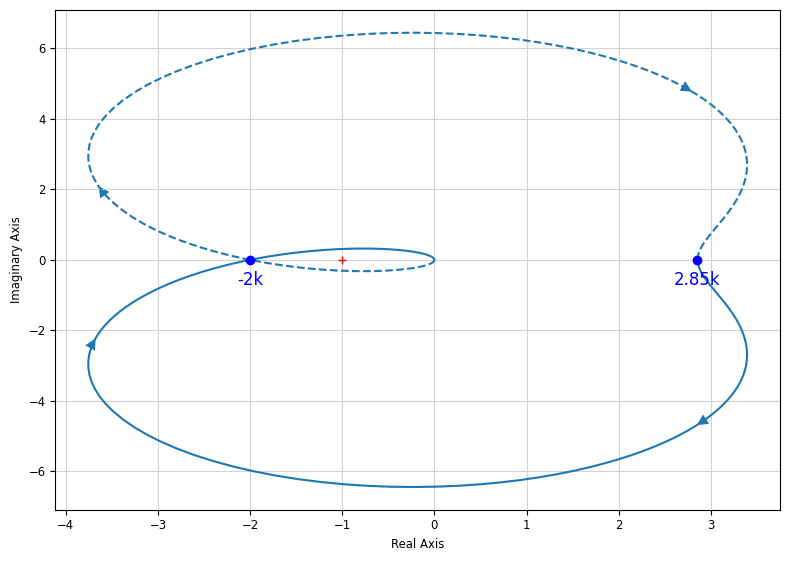

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = 8(s-25) / (s^2 + 4s + 70)
num = [-8, 200]  # (8s - 200)
den = [1, 4, 70]  # (s^2 + 4s + 70)

# Create transfer function
G = ctl.tf(num, den)

# Create Nyquist plot
plt.figure(figsize=(8, 6))
ctl.nyquist(G)

# Remove automatic title
plt.suptitle("")  # Removes figure-level title

# Custom axis labels
plt.xlabel("Real Axis")
plt.ylabel("Imaginary Axis")

# Mark points where the Nyquist plot crosses the real axis
real_crossings = [-2, 2.85]  # Real-axis intersection points
imag_values = [0, 0]  # These are on the real axis

# Plot and label the intersection points
plt.scatter(real_crossings, imag_values, color='blue', zorder=3)
for x, y in zip(real_crossings, imag_values):
    plt.text(x, y - 0.7, f"{x}k", fontsize=12, ha='center', color='blue')  # Adjust position below x-axis

# Enable grid
plt.grid(True)
plt.savefig("r6_ex4_v2", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\Omri\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\freqplot.py:1786: UserWarning: number of encirclements does not match Nyquist criterion; check frequency range and indent radius/direction
  nyquist_responses = nyquist_response(


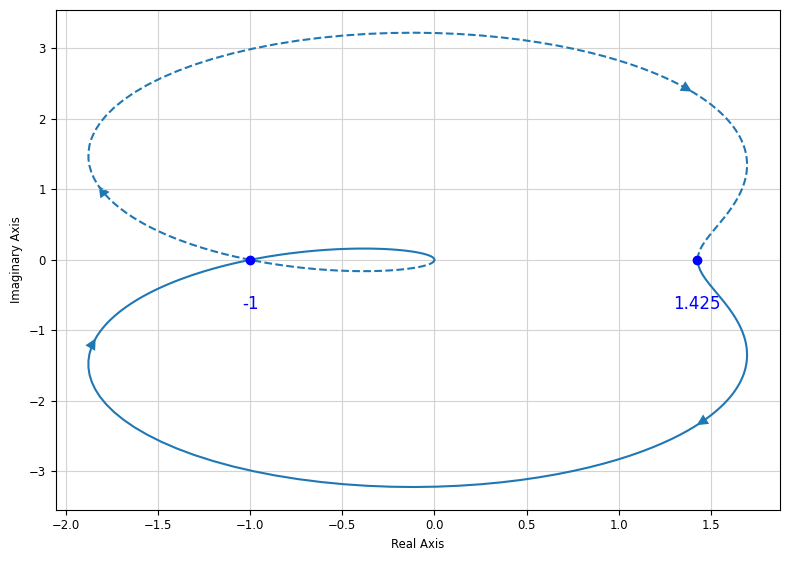

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = 8(s-25) / (s^2 + 4s + 70)
num = [-4, 100]  # (8s - 200)
den = [1, 4, 70]  # (s^2 + 4s + 70)

# Create transfer function
G = ctl.tf(num, den)

# Create Nyquist plot
plt.figure(figsize=(8, 6))
ctl.nyquist(G)

# Remove automatic title
plt.suptitle("")  # Removes figure-level title

# Custom axis labels
plt.xlabel("Real Axis")
plt.ylabel("Imaginary Axis")

# Mark points where the Nyquist plot crosses the real axis
real_crossings = [-1, 1.425]  # Real-axis intersection points
imag_values = [0, 0]  # These are on the real axis

# Plot and label the intersection points
plt.scatter(real_crossings, imag_values, color='blue', zorder=3)
for x, y in zip(real_crossings, imag_values):
    plt.text(x, y - 0.7, f"{x}", fontsize=12, ha='center', color='blue')  # Adjust position below x-axis

# Enable grid
plt.grid(True)
plt.savefig("r6_ex4_v2", dpi=300, bbox_inches='tight')
plt.show()


AttributeError: Line2D.set() got an unexpected keyword argument 'Plot'

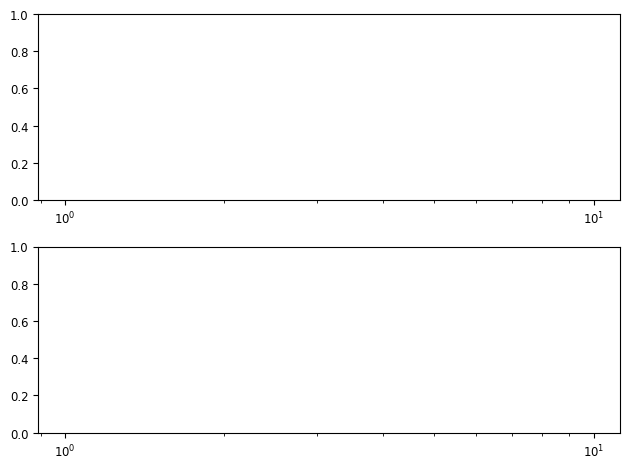

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = 40 / (s(s+3)(s+1))
num = [40]  # Numerator: 40
den = np.polymul([1, 0], np.polymul([1, 3], [1, 1]))  # Denominator: s(s+3)(s+1)

# Create transfer function
G = ctl.tf(num, den)

# Compute Bode plot and margins
mag, phase, omega = ctl.bode(G, dB=True, deg=True, Plot=False)
gm, pm, wg, wp = ctl.margin(G)

# Create figure for Bode plot
fig, (ax_mag, ax_phase) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Magnitude plot
ax_mag.semilogx(omega, 20 * np.log10(mag), label="Magnitude")
ax_mag.axvline(wg, color='r', linestyle='--', label=f"Gain Crossover: {wg:.2f} rad/s")
ax_mag.set_ylabel("Magnitude (dB)")
ax_mag.grid(True)
ax_mag.legend()

# Phase plot
ax_phase.semilogx(omega, phase, label="Phase")
ax_phase.axhline(-180, color='gray', linestyle='--', alpha=0.7)
ax_phase.axvline(wp, color='b', linestyle='--', label=f"Phase Crossover: {wp:.2f} rad/s")
ax_phase.set_xlabel("Frequency (rad/s)")
ax_phase.set_ylabel("Phase (degrees)")
ax_phase.grid(True)
ax_phase.legend()

# Display Gain and Phase Margins
plt.suptitle(f"Gain Margin: {20*np.log10(gm):.2f} dB, Phase Margin: {pm:.2f}°")

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import control

# Define the transfer function G(s) = (s + 3) / (s(s + 2))
numerator = [1, 3]
denominator = [1, 2, 0]
G = control.TransferFunction(numerator, denominator)

# Plot the root locus
plt.figure()
control.root_locus(G, Plot=True, grid=True)
plt.title("Root Locus of $G(s) = \\frac{s+3}{s(s+2)}$")
plt.xlabel("Re")
plt.ylabel("Im")
plt.axhline(0, color='black', linewidth=0.5)  # horizontal axis
plt.axvline(0, color='black', linewidth=0.5)  # vertical axis
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import control

# Define the transfer function G(s) = (s + 3) / (s(s + 2))
numerator = [1, 3]
denominator = [1, 2, 0]
G = control.TransferFunction(numerator, denominator)

# Plot the root locus
plt.figure()
control.root_locus(G, plot=True, grid=True)
plt.title("Root Locus of $G(s) = \\frac{s+3}{s(s+2)}$")
plt.xlabel("Re")
plt.ylabel("Im")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = (s+2)(s+3) / (s(s+1))
numerator = [1, 3]
denominator = [1, 2, 0]

# Create the transfer function
G = control.TransferFunction(numerator, denominator)

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the root locus
ctl.rlocus(G, grid=True, ax=ax)  # Pass ax to control where the plot goes

# Remove the automatically generated title
ax.set_title("")  # This removes the auto-generated title

# Customize axis labels and grid
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(False)

plt.savefig("RL_lec_ex1", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function
numerator = [1, 3]
denominator = [1, 2, 0]
G = ctl.TransferFunction(numerator, denominator)

# Get root locus data
rlocus_data = ctl.root_locus_map(G)
rlist = rlocus_data.loci
klist = rlocus_data.gains

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.real(rlist), np.imag(rlist), 'b')

# Add arrows
for i in range(rlist.shape[1]):
    for j in range(0, rlist.shape[0] - 1, 20):
        x0, y0 = np.real(rlist[j, i]), np.imag(rlist[j, i])
        x1, y1 = np.real(rlist[j + 1, i]), np.imag(rlist[j + 1, i])
        dx, dy = x1 - x0, y1 - y0
        ax.arrow(x0, y0, dx, dy,
                 head_width=0.05, head_length=0.1, fc='blue', ec='blue', length_includes_head=True)

# Customize appearance
ax.set_title("")
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_aspect('equal', adjustable='box')
ax.grid(False)

plt.savefig("RL_lec_ex1_arrows", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = (s+3)/(s(s+2))
numerator = [1, 3]
denominator = [1, 2, 0]
G = ctl.TransferFunction(numerator, denominator)

# Get root locus data using new API
data = ctl.root_locus_map(G)
rlist = data.loci      # Shape: (num gains, num branches)
klist = data.gains     # Gain values (not used here but available)

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each branch separately
num_branches = rlist.shape[1]
for i in range(num_branches):
    x = np.real(rlist[:, i])
    y = np.imag(rlist[:, i])
    ax.plot(x, y, 'b')

    # Add arrows to each branch every N steps
    for j in range(0, len(x) - 1, 20):
        dx = x[j+1] - x[j]
        dy = y[j+1] - y[j]
        ax.arrow(x[j], y[j], dx, dy,
                 head_width=0.05, head_length=0.1,
                 fc='blue', ec='blue',
                 length_includes_head=True)

# Add axis lines
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Format plot
ax.set_title("")
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")
ax.set_aspect('equal', adjustable='box')
ax.grid(False)

# Save and show
plt.savefig("RL_lec_ex1_arrows", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = (s+2)(s+3) / (s(s+1))
numerator = [1, 3]
denominator = [1, 2, 0]

# Create the transfer function
G = control.TransferFunction(numerator, denominator)

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the root locus
ctl.rlocus(G, grid=True, ax=ax)  # Pass ax to control where the plot goes

# Remove the automatically generated title
ax.set_title("")  # This removes the auto-generated title

# Customize axis labels and grid
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(False)

plt.savefig("RL_lec_ex1", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = (s+2)(s+3) / (s(s+1))
numerator = [-1, -3]
denominator = [1, 2, 0]

# Create the transfer function
G = control.TransferFunction(numerator, denominator)

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the root locus
ctl.rlocus(G, grid=True, ax=ax)  # Pass ax to control where the plot goes

# Remove the automatically generated title
ax.set_title("")  # This removes the auto-generated title

# Customize axis labels and grid
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(False)

plt.savefig("RL_lec_ex1", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define parameters
p = -2    # p < 0
m = 3     # m > 0

# Define the transfer function G(s) = mk / (s^2 (s - p))
numerator = [m]                # m * k
denominator = [1, -p, 0, 0]    # s^3 - p*s^2

# Create the transfer function
G = ctl.TransferFunction(numerator, denominator)

# Plot the root locus
fig, ax = plt.subplots(figsize=(8, 6))
ctl.rlocus(G, grid=True, ax=ax)

# Customize the plot
ax.set_title("")  # Remove automatic title
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")

# Remove ticks on x and y axes
ax.set_xticks([])
ax.set_yticks([])

# Add black lines for axes
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)

# Mark the pole at s = p
#ax.plot(p, 2, 'rx', markersize=10, label=f'$p={p}$')
ax.text(p - 0.05, -0.3, r'$p$', fontsize=14)

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define parameters
p = -2    # p < 0
m = 3     # m > 0

# Define the transfer function G(s) = mk / (s^2 (s - p))
numerator = [m]                # m * k
denominator = [1, -p, 0, 0]    # s^3 - p*s^2

# Create the transfer function
G = ctl.TransferFunction(numerator, denominator)

# Plot the root locus
fig, ax = plt.subplots(figsize=(8, 6))
rlist, klist = ctl.root_locus(G, plot=False)
ctl.rlocus(G, grid=True, ax=ax)
# Add arrows to the root locus
for branch in np.transpose(rlist):  # each branch is a column (fixed root)
    for i in range(10, len(branch), 10):
        x1, y1 = branch[i-1].real, branch[i-1].imag
        x2, y2 = branch[i].real, branch[i].imag
        # Skip very short segments to avoid clutter
        if np.hypot(x2 - x1, y2 - y1) > 0.1:
            ax.annotate("",
                        xy=(x2, y2), xytext=(x1, y1),
                        arrowprops=dict(arrowstyle="->", color="blue", linewidth=1))
# Customize the plot
ax.set_title("")  # Remove automatic title
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")

# Remove ticks on x and y axes
ax.set_xticks([0])
ax.set_yticks([0])

# Add black lines for axes
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)

# Mark the pole at s = p
#ax.plot(p, 2, 'rx', markersize=10, label=f'$p={p}$')
ax.text(p - 0.05, -0.3, r'$p$', fontsize=14)

ax.text(-0.7, -0.4, r'$\frac{p}{3}$', fontsize=14)

# Add asymptotes
sigma_a = ( p) / 3  # Asymptote center

# Asymptote angles in radians
angles = [np.pi/3, -np.pi/3]  # 60 degrees and -60 degrees

# Length of asymptote lines
L = 10

# Plot asymptotes
for angle in angles:
    x_asym = [sigma_a, sigma_a + L * np.cos(angle)]
    y_asym = [0, L * np.sin(angle)]
    ax.plot(x_asym, y_asym, 'k--', linewidth=1.2)  # Dotted black lines

# Optionally, mark the center point sigma_a
ax.plot(sigma_a, 0, 'ko', markersize=5)  # small black circle

plt.savefig("HW3_EX11", dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = (s+3)/(s^2 (s+2))
numerator = [1, 3]         # (s + 3)
denominator = [1, 2, 0, 0] # s^3 + 2s^2

# Create the transfer function
G = ctl.TransferFunction(numerator, denominator)

# Plot the root locus
fig, ax = plt.subplots(figsize=(8, 6))
ctl.rlocus(G, grid=True, ax=ax)

# Customize the plot
ax.set_title("")  # Remove automatic title
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")

ax.set_xticks([0])
ax.set_yticks([0])

# Show axis lines
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)

ax.text(p - 0.08, -0.5, r'$p$', fontsize=14)
ax.text(p - 1.245, -0.5, r'$-\alpha$', fontsize=14)
ax.text(0.36, -0.65, r'$\frac{\alpha+p}{2}$', fontsize=14)

# Add asymptotes
sigma_a = (1) / 2  # Asymptote center

# Asymptote angles in radians
angles = [np.pi/2, -np.pi/2]  # 60 degrees and -60 degrees

# Length of asymptote lines
L = 10

# Plot asymptotes
for angle in angles:
    x_asym = [sigma_a, sigma_a + L * np.cos(angle)]
    y_asym = [0, L * np.sin(angle)]
    ax.plot(x_asym, y_asym, 'k--', linewidth=1.2)  # Dotted black lines

# Optionally, mark the center point sigma_a
ax.plot(sigma_a, 0, 'ko', markersize=5)  # small black circle

plt.savefig("HW3_EX12", dpi=300, bbox_inches='tight')


plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = (s+3)/(s^3 (s+2))
numerator = [1, 3]           # (s + 3)
denominator = [1, 2, 0, 0, 0] # s^4 + 2s^3

# Create the transfer function
G = ctl.TransferFunction(numerator, denominator)

# Plot the root locus
fig, ax = plt.subplots(figsize=(8, 6))
rlist, klist = ctl.root_locus(G, plot=False)
ctl.rlocus(G, grid=True, ax=ax)
# Add arrows to the root locus
for branch in np.transpose(rlist):  # each branch is a column (fixed root)
    for i in range(10, len(branch), 10):
        x1, y1 = branch[i-1].real, branch[i-1].imag
        x2, y2 = branch[i].real, branch[i].imag
        # Skip very short segments to avoid clutter
        if np.hypot(x2 - x1, y2 - y1) > 0.1:
            ax.annotate("",
                        xy=(x2, y2), xytext=(x1, y1),
                        arrowprops=dict(arrowstyle="->", color="blue", linewidth=1))
# Customize the plot
ax.set_title("")  # Remove automatic title
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")

ax.set_xticks([0])
ax.set_yticks([0])

ax.text(p - 0.08, -0.2, r'$p$', fontsize=14)
ax.text(p - 1.245, -0.2, r'$-\alpha$', fontsize=14)
ax.text(-5/4, -0.2, r'$\frac{p-\alpha}{3}$', fontsize=14)

# Add asymptotes
sigma_a = (-3) / 4  # Asymptote center

# Asymptote angles in radians
angles = [np.pi/3, -np.pi/3]  # 60 degrees and -60 degrees

# Length of asymptote lines
L = 10

# Plot asymptotes
for angle in angles:
    x_asym = [sigma_a, sigma_a + L * np.cos(angle)]
    y_asym = [0, L * np.sin(angle)]
    ax.plot(x_asym, y_asym, 'k--', linewidth=1.2)  # Dotted black lines

# Optionally, mark the center point sigma_a
ax.plot(sigma_a, 0, 'ko', markersize=5)  # small black circle

# Add axis lines
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)

plt.savefig("HW3_EX12", dpi=300, bbox_inches='tight')


plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = (s+2)/(s^2 (s+3))
numerator = [1, 2]          # (s + 2)
denominator = [1, 3, 0, 0]  # s^3 + 3s^2

# Create the transfer function
G = ctl.TransferFunction(numerator, denominator)

# Plot the root locus
fig, ax = plt.subplots(figsize=(8, 6))
rlist, klist = ctl.root_locus(G, plot=False)
ctl.rlocus(G, grid=True, ax=ax)
# Add arrows to the root locus
for branch in np.transpose(rlist):  # each branch is a column (fixed root)
    for i in range(10, len(branch), 10):
        x1, y1 = branch[i-1].real, branch[i-1].imag
        x2, y2 = branch[i].real, branch[i].imag
        # Skip very short segments to avoid clutter
        if np.hypot(x2 - x1, y2 - y1) > 0.1:
            ax.annotate("",
                        xy=(x2, y2), xytext=(x1, y1),
                        arrowprops=dict(arrowstyle="->", color="blue", linewidth=1))
# Customize the plot
ax.set_title("")  # Remove automatic title
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")

ax.set_xticks([0])
ax.set_yticks([0])

ax.text(p - 0.08, -0.5, r'$z$', fontsize=14)
ax.text(p - 1.1, -0.5, r'$p$', fontsize=14)
ax.text(-1/2, -0.6, r'$\frac{p-z}{2}$', fontsize=14)

# Add asymptotes
sigma_a = (-1) / 2  # Asymptote center

# Asymptote angles in radians
angles = [np.pi/2, -np.pi/2]  # 60 degrees and -60 degrees

# Length of asymptote lines
L = 10

# Plot asymptotes
for angle in angles:
    x_asym = [sigma_a, sigma_a + L * np.cos(angle)]
    y_asym = [0, L * np.sin(angle)]
    ax.plot(x_asym, y_asym, 'k--', linewidth=1.2)  # Dotted black lines

# Optionally, mark the center point sigma_a
ax.plot(sigma_a, 0, 'ko', markersize=5)  # small black circle

# Add axis lines
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)

# Add axis lines
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)

plt.savefig("HW3_EX13", dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the delay
delay = 2  # e^{-2s}

# Pade approximation of the delay (order 1)
num_delay, den_delay = ctl.pade(delay, 1)

# Define the original transfer function without delay
num_system = [1]
den_system = [1, 1, 0]  # s(s+1) = s^2 + s

# Combine system with delay
num_total = np.polymul(num_system, num_delay)
den_total = np.polymul(den_system, den_delay)

# Create the transfer function
G = ctl.TransferFunction(num_total, den_total)

# Plot the root locus
fig, ax = plt.subplots(figsize=(8, 6))
ctl.rlocus(G, grid=True, ax=ax)

# Customize the plot
ax.set_title("")  # Remove automatic title
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")

# Add axis lines
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = 1/(s(s^2 + 1))
numerator = [1]              # 1
denominator = [1, 0, 1, 0]   # s^3 + s

# Create the transfer function
G = ctl.TransferFunction(numerator, denominator)

# Plot the root locus
fig, ax = plt.subplots(figsize=(8, 6))
ctl.rlocus(G, grid=True, ax=ax)

# Customize the plot
ax.set_title("")  # Remove automatic title
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")

# Add axis lines
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = 1/(s(3s^2 + 1))
numerator = [-1]              # 1
denominator = [3, 0, 1, 0]   # 3s^3 + s

# Create the transfer function
G = ctl.TransferFunction(numerator, denominator)

# Plot the root locus
fig, ax = plt.subplots(figsize=(8, 6))
ctl.rlocus(G, grid=True, ax=ax)

# Customize the plot
ax.set_title("")  # Remove automatic title
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")

ax.set_xticks([0])
ax.set_yticks([0])

ax.text(-0.23, 0.57, r'$j\sqrt{\alpha^{-1}}$', fontsize=14)
ax.text(-0.26, -0.6, r'$-j\sqrt{\alpha^{-1}}$', fontsize=14)


# Add asymptotes
sigma_a = 0  # Asymptote center

# Asymptote angles in radians
angles = [np.pi/(4/3), -np.pi/(4/3)]  # 60 degrees and -60 degrees

# Length of asymptote lines
L = 10

# Plot asymptotes
for angle in angles:
    x_asym = [sigma_a, sigma_a + L * np.cos(angle)]
    y_asym = [0, L * np.sin(angle)]
    ax.plot(x_asym, y_asym, 'k--', linewidth=1.2)  # Dotted black lines



# Add axis lines
ax.axhline(0, color='black', linewidth=0.4)
ax.axvline(0, color='black', linewidth=0.8)

plt.savefig("HW3_EX31", dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define parameters
p = -2    # p < 0
m = 3     # m > 0

# Define the transfer function G(s) = mk / (s^2 (s - p))
numerator = [-m]                # m * k
denominator = [1, -p, 0, 0]    # s^3 - p*s^2

# Create the transfer function
G = ctl.TransferFunction(numerator, denominator)

# Plot the root locus
fig, ax = plt.subplots(figsize=(8, 6))
rlist, klist = ctl.root_locus(G, plot=False)
ctl.rlocus(G, grid=True, ax=ax)
# Add arrows to the root locus
for branch in np.transpose(rlist):  # each branch is a column (fixed root)
    for i in range(10, len(branch), 10):
        x1, y1 = branch[i-1].real, branch[i-1].imag
        x2, y2 = branch[i].real, branch[i].imag
        # Skip very short segments to avoid clutter
        if np.hypot(x2 - x1, y2 - y1) > 0.001:
            ax.annotate("",
                        xy=(x2, y2), xytext=(x1, y1),
                        arrowprops=dict(arrowstyle="->", color="blue", linewidth=1))
# Customize the plot
ax.set_title("")  # Remove automatic title
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")

# Remove ticks on x and y axes
ax.set_xticks([0])
ax.set_yticks([0])

# Add black lines for axes
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)

# Mark the pole at s = p
#ax.plot(p, 2, 'rx', markersize=10, label=f'$p={p}$')
ax.text(p - 0.05, -0.3, r'$p$', fontsize=14)

ax.text(-0.7, -0.4, r'$\frac{p}{3}$', fontsize=14)

# Add asymptotes
sigma_a = ( p) / 3  # Asymptote center

# Asymptote angles in radians
angles = [2*np.pi/3, -2*np.pi/3]  # 120 degrees and -120 degrees

# Length of asymptote lines
L = 10

# Plot asymptotes
for angle in angles:
    x_asym = [sigma_a, sigma_a + L * np.cos(angle)]
    y_asym = [0, L * np.sin(angle)]
    ax.plot(x_asym, y_asym, 'k--', linewidth=1.2)  # Dotted black lines

# Optionally, mark the center point sigma_a
ax.plot(sigma_a, 0, 'ko', markersize=5)  # small black circle

plt.savefig("HW3_EX112", dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = (s+3)/(s^3 (s+2))
numerator = [-1, -3]           # (s + 3)
denominator = [1, 2, 0, 0, 0] # s^4 + 2s^3

# Create the transfer function
G = ctl.TransferFunction(numerator, denominator)

# Plot the root locus
fig, ax = plt.subplots(figsize=(8, 6))
rlist, klist = ctl.root_locus(G, plot=False)
ctl.rlocus(G, grid=True, ax=ax)
# Add arrows to the root locus
for branch in np.transpose(rlist):  # each branch is a column (fixed root)
    for i in range(10, len(branch), 10):
        x1, y1 = branch[i-1].real, branch[i-1].imag
        x2, y2 = branch[i].real, branch[i].imag
        # Skip very short segments to avoid clutter
        if np.hypot(x2 - x1, y2 - y1) > 0.1:
            ax.annotate("",
                        xy=(x2, y2), xytext=(x1, y1),
                        arrowprops=dict(arrowstyle="->", color="blue", linewidth=1))
# Customize the plot
ax.set_title("")  # Remove automatic title
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")

ax.set_xticks([0])
ax.set_yticks([0])

ax.text(p - 0.08, -0.4, r'$p$', fontsize=14)
ax.text(p - 1.245, -0.4, r'$-\alpha$', fontsize=14)
ax.text(-0.8, -0.6, r'$\frac{p-\alpha}{3}$', fontsize=14)

# Add asymptotes
sigma_a = (-3) / 4  # Asymptote center

# Asymptote angles in radians
angles = [2*np.pi/3, -2*np.pi/3]  # 120 degrees and -120 degrees

# Length of asymptote lines
L = 10

# Plot asymptotes
for angle in angles:
    x_asym = [sigma_a, sigma_a + L * np.cos(angle)]
    y_asym = [0, L * np.sin(angle)]
    ax.plot(x_asym, y_asym, 'k--', linewidth=1.2)  # Dotted black lines

# Optionally, mark the center point sigma_a
ax.plot(sigma_a, 0, 'ko', markersize=5)  # small black circle

# Add axis lines
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)

plt.savefig("HW3_EX12_negative", dpi=300, bbox_inches='tight')


plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = (s+3)/(s^3 (s+2))
numerator = [1]           # (s + 3)
denominator = [1, 0 ,1] # s^4 + 2s^3

# Create the transfer function
G = ctl.TransferFunction(numerator, denominator)

# Plot the root locus
fig, ax = plt.subplots(figsize=(8, 6))
rlist, klist = ctl.root_locus(G, plot=False)
ctl.rlocus(G, grid=True, ax=ax)
# Add arrows to the root locus
for branch in np.transpose(rlist):  # each branch is a column (fixed root)
    for i in range(10, len(branch), 10):
        x1, y1 = branch[i-1].real, branch[i-1].imag
        x2, y2 = branch[i].real, branch[i].imag
        # Skip very short segments to avoid clutter
        if np.hypot(x2 - x1, y2 - y1) > 0.01:
            ax.annotate("",
                        xy=(x2, y2), xytext=(x1, y1),
                        arrowprops=dict(arrowstyle="->", color="blue", linewidth=1))
# Customize the plot
ax.set_title("")  # Remove automatic title
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")

ax.set_xticks([0])
ax.set_yticks([0])




# Add axis lines
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)

plt.savefig("HW3_EX3", dpi=300, bbox_inches='tight')


plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = ((s+2)/(s+3)) * (1/(s^2+1))
num1 = [1, 2]
den1 = [1, 3]
num2 = [1]
den2 = [1, 0, 1]

# Multiply numerators and denominators
numerator = np.polymul(num1, num2)
denominator = np.polymul(den1, den2)

# Create transfer function
G = ctl.TransferFunction(numerator, denominator)

# Compute poles and zeros
zeros = G.zeros()
poles = G.poles()
num_zeros = len(zeros)
num_poles = len(poles)
# Compute asymptote center γ
gamma = (np.sum(poles) - np.sum(zeros)) / (num_poles - num_zeros)

# Plot setup
fig, ax = plt.subplots(figsize=(8, 6))

# Compute root locus without plotting yet
rlist, klist = ctl.root_locus(G, plot=False)

# Plot the root locus
ctl.rlocus(G, grid=True, ax=ax)

# Add arrows to root locus branches
for branch in np.transpose(rlist):
    for i in range(10, len(branch), 1000):
        x1, y1 = branch[i - 1].real, branch[i - 1].imag
        x2, y2 = branch[i].real, branch[i].imag
        if abs(x2 - x1) > 1e-3 or abs(y2 - y1) > 1e-3:
            ax.annotate("",
                        xy=(x2, y2), xytext=(x1, y1),
                        arrowprops=dict(arrowstyle="->", color="blue", linewidth=1))

# Customize plot appearance
ax.set_title("")
ax.set_xlabel("Real Axis")
ax.set_ylabel("Imaginary Axis")
ax.axhline(0, color='black', linewidth=0.8)
ax.axvline(0, color='black', linewidth=0.8)
ax.set_xticks([0])
ax.set_yticks([0])

# Plot asymptotes if needed
n_asymptotes = num_poles - num_zeros
if n_asymptotes > 0:
    angles = [(2*k + 1)*np.pi / n_asymptotes for k in range(n_asymptotes)]
    L = 10
    for angle in angles:
        x_asym = [gamma, gamma + L * np.cos(angle)]
        y_asym = [0, L * np.sin(angle)]
        ax.plot(x_asym, y_asym, 'k--', linewidth=1.2)

    # Mark asymptote center γ
    ax.plot(gamma, 0, 'ko', markersize=5)
    ax.text(gamma + 0.1, -0.15, r'$\gamma$', fontsize=14)
ax.text(p - 0.08, -0.15, r'$z$', fontsize=14)
ax.text(p - 1.1, -0.15, r'$p$', fontsize=14)

plt.savefig("HW3_EX3_example", dpi=300, bbox_inches='tight')


plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import matplotlib.patches as patches

# Set up the interactive function
def plot_complex(r=1.0, theta_deg=0.0):
    theta_rad = np.deg2rad(theta_deg)
    z = r * np.exp(1j * theta_rad)

    # Create the figure and plot
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_aspect('equal')
    ax.grid(True)

    # Axes labels and ticks
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    ax.axhline(0, color='black', lw=1)
    ax.axvline(0, color='black', lw=1)

    # Plot the complex number
    ax.plot([0, z.real], [0, z.imag], marker='o', color='blue')
    ax.text(z.real, z.imag, f"  {z:.2f}", fontsize=12)

    # Optional: show angle arc
    arc = patches.Arc((0, 0), 4, 4, angle=0, theta1=0, theta2=theta_deg, color='red')
    ax.add_patch(arc)
    ax.text(2.2, 0.3, f"$\\theta={theta_deg}^\\circ$", color='red')

    plt.show()

# Sliders for r and theta
interact(plot_complex,
         r=FloatSlider(value=1.0, min=0.0, max=10.0, step=0.1, description='Magnitude (r)'),
         theta_deg=FloatSlider(value=0.0, min=-360.0, max=360.0, step=1.0, description='Phase (°)'));


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
from ipywidgets import interact, FloatSlider

def nyquist_plot(k=1.0):
    # Define transfer function: G(s) = k / [(s+1)(s-1)] = k / (s^2 - 1)
    num = [k]
    den = [1, 0, -1]
    G = ctl.TransferFunction(num, den)

    # Frequency range (including negative frequencies for full Nyquist)
    omega = np.logspace(-2, 2, 1000)
    s_pos = 1j * omega
    s_neg = -1j * omega

    # Evaluate G(s) for both positive and negative frequencies
    _, y_pos = ctl.freqresp(G, omega)
    _, y_neg = ctl.freqresp(G, -omega)

    # Combine responses
    y_full = np.concatenate((y_neg[0][::-1], y_pos[0]))

    # Plot Nyquist
    plt.figure(figsize=(6, 6))
    plt.plot(y_full.real, y_full.imag, label='Nyquist Curve', color='blue')
    plt.plot(-1, 0, 'ro', label='Critical Point (-1,0)')

    # Axes formatting
    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0, color='black', linewidth=0.8)
    plt.grid(True, which='both')
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.title(rf"Nyquist Plot of $G(s) = \frac{{{k}}}{{(s+1)(s-1)}}$")
    plt.legend()
    plt.axis('equal')  # aspect ratio fix
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.show()

# Interactive widget
interact(nyquist_plot, k=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Gain (k)'));


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = 2 / ((s+1)(s-1))
num = [2]  # Numerator coefficients
den = np.polymul([1, 1], [1, -1])  # Denominator: (s+1)(s-1) = s^2 - 1

# Create the transfer function
G = ctl.tf(num, den)

# Create a Nyquist plot
plt.figure(figsize=(8, 6))
ctl.nyquist(G, omega=np.logspace(-2, 2, 1000))

# Remove the auto-generated title
plt.suptitle("")  # Removes the figure's main title

# Axis labels and grid
plt.xlabel("Real Axis")
plt.ylabel("Imaginary Axis")
plt.grid(True)

# Save the figure (optional)
plt.savefig("REC6_EX2_example", dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
from ipywidgets import interact, FloatSlider

# Nyquist plot function with parameter k
def nyquist_with_slider(k=1.0):
    # Define the transfer function G(s) = k / ((s+1)(s-1))
    num = [k]
    den = np.polymul([1, 1], [1, -1])  # (s+1)(s-1) = s^2 - 1
    G = ctl.tf(num, den)

    # Create the Nyquist plot
    plt.figure(figsize=(8, 6))
    ctl.nyquist(G, omega=np.logspace(-2, 2, 1000))
    
    # Plot settings
    plt.suptitle("")  # Removes the figure's main title
    plt.xlabel("Real Axis")
    plt.ylabel("Imaginary Axis")
    plt.grid(True)
    plt.title(rf"Nyquist Plot of $G(s) = \frac{{{k}}}{{(s+1)(s-1)}}$")
    plt.show()

# Create the slider
interact(nyquist_with_slider, k=FloatSlider(value=1.0, min=0.0, max=5.0, step=0.1, description='Gain k'));


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
from ipywidgets import interact, FloatSlider

# Interactive Nyquist plot function
def nyquist_dynamic_k(k=1.0):
    # Define transfer function: G(s) = 8k(s - 25) / (s^2 + 4s + 70)
    num = [8 * k, -200 * k]
    den = [1, 4, 70]
    G = ctl.tf(num, den)

    # Create Nyquist plot
    plt.figure(figsize=(8, 6))
    ctl.nyquist(G, omega=np.logspace(-2, 2, 1000))

    # Remove automatic suptitle
    plt.suptitle("")

    # Label axes
    plt.xlabel("Real Axis")
    plt.ylabel("Imaginary Axis")

    # Estimate real-axis crossings (scale with k)
    real_crossings = [2 * k, -2.85 * k]
    imag_values = [0, 0]

    # Mark and annotate real-axis crossings
    plt.scatter(real_crossings, imag_values, color='blue', zorder=3)
    for x, y in zip(real_crossings, imag_values):
        plt.text(x, y - 1, f"{x:.2f}", fontsize=12, ha='center', color='blue')

    # Grid and title
    plt.grid(True)
    plt.title(rf"Nyquist Plot of $G(s) = \frac{{8 \cdot {k:.2f}(s - 25)}}{{s^2 + 4s + 70}}$")
    plt.show()

# Create slider for k in [-5, 5]
interact(nyquist_dynamic_k, k=FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description='Gain k'));


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Time range
t_vals = np.linspace(0, 20, 500)

# Oscillators
def z1(t): return 2 * np.exp(1j * 3 * t)          # Fast inner oscillator
def z2(t): return 3 * np.exp(1j * 0.5 * t)        # Slow outer oscillator
def z(t): return z1(t) + z2(t)

# Create figure
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_aspect("equal")
ax.grid(True)
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.set_title(r"$z(t) = 2e^{i3t} + 3e^{0.5it}$")

# Plot elements
pt_total, = ax.plot([], [], 'ro', label=r"$z(t)$")
trace_total, = ax.plot([], [], 'r-', alpha=0.6)
pt_z1, = ax.plot([], [], 'bo', label=r"$z_1(t)$")
pt_z2, = ax.plot([], [], 'go', label=r"$z_2(t)$")

xdata, ydata = [], []

def init():
    pt_total.set_data([], [])
    trace_total.set_data([], [])
    pt_z1.set_data([], [])
    pt_z2.set_data([], [])
    return pt_total, trace_total, pt_z1, pt_z2

def update(frame):
    t = t_vals[frame]
    z1_val = z1(t)
    z2_val = z2(t)
    z_total = z1_val + z2_val

    x, y = z_total.real, z_total.imag
    xdata.append(x)
    ydata.append(y)

    pt_total.set_data(x, y)
    trace_total.set_data(xdata, ydata)
    pt_z1.set_data(z1_val.real, z1_val.imag)
    pt_z2.set_data(z_total.real, z_total.imag)  # z2 riding on z1

    return pt_total, trace_total, pt_z1, pt_z2

ax.legend()

# Save animation as GIF (you can open this manually in any browser)
ani = animation.FuncAnimation(fig, update, frames=len(t_vals),
                              init_func=init, blit=True, interval=30)

ani.save("z_motion.gif", writer="pillow", fps=30)
print("GIF saved as 'z_motion.gif'")


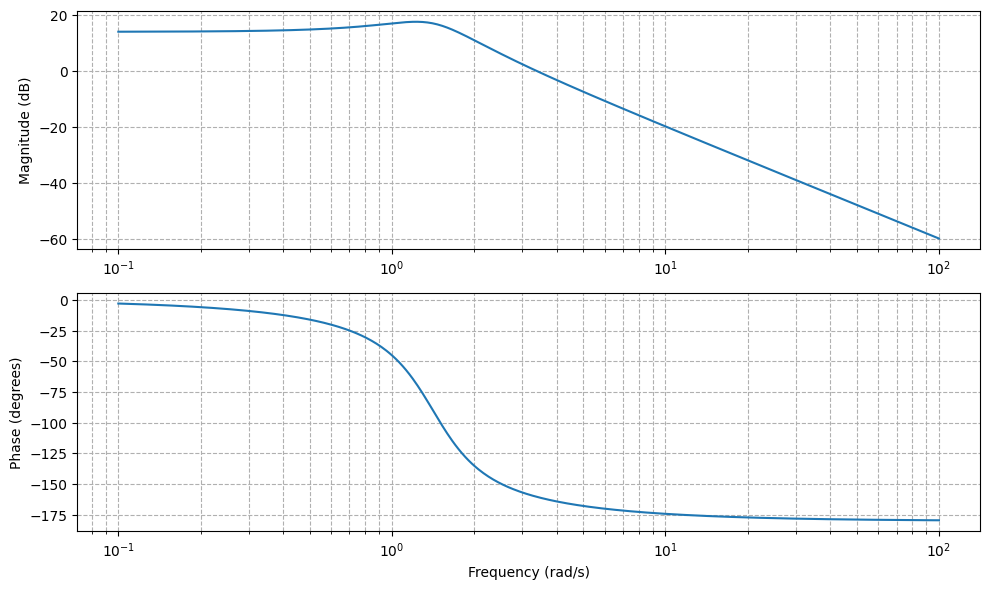

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = 10 / (s^2 + s + 2)
G = ctl.TransferFunction([10], [1, 1, 2])

# Frequency range (rad/s)
omega = np.logspace(-1, 2, 500)

# Get the frequency response
mag, phase_rad, omega = ctl.bode(G, omega, dB=False, deg=False, plot=False)

# Convert to dB and degrees manually
mag_db = 20 * np.log10(mag)
phase_deg = np.degrees(phase_rad)

# Plot
plt.figure(figsize=(10, 6))

# Magnitude plot
plt.subplot(2, 1, 1)
plt.semilogx(omega, mag_db)
plt.ylabel("Magnitude (dB)")
plt.grid(True, which="both", linestyle="--")

# Phase plot
plt.subplot(2, 1, 2)
plt.semilogx(omega, phase_deg)
plt.ylabel("Phase (degrees)")
plt.xlabel("Frequency (rad/s)")
plt.grid(True, which="both", linestyle="--")

plt.tight_layout()
plt.savefig("HW4_Q2_Bode1", dpi=300, bbox_inches='tight')

plt.show()


C:\Users\Omri\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\freqplot.py:1799: FutureWarning: nyquist_plot() return value of count[, contour] is deprecated; use nyquist_response()
  warnings.warn(


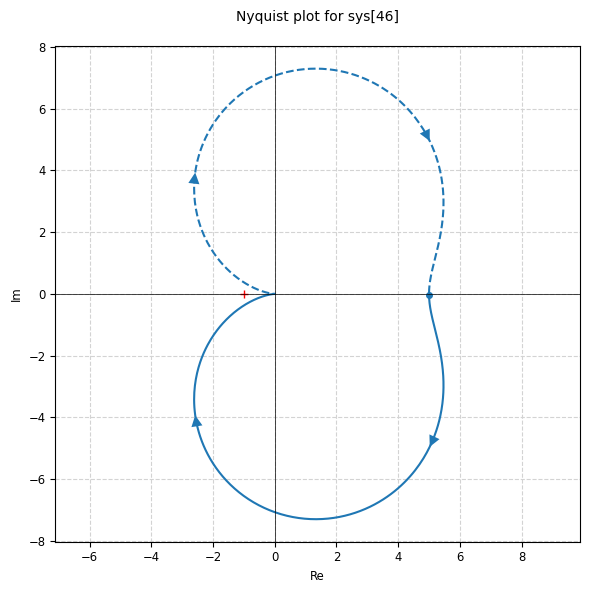

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function
G = ctl.TransferFunction([10], [1, 1, 2])

# Create figure
plt.figure(figsize=(6, 6))

# Generate Nyquist plot (don't unpack return value)
ctl.nyquist_plot(G, omega=np.logspace(-2, 2, 1000), plot=True)

# Remove default title added by nyquist_plot
plt.gca().set_title("")

# Enhance plot appearance
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True, which="both", linestyle='--')
plt.xlabel("Re")
plt.ylabel("Im")

plt.axis("equal")
plt.tight_layout()
plt.savefig("HW4_Q2_Nyquist1", dpi=300, bbox_inches='tight')

plt.show()


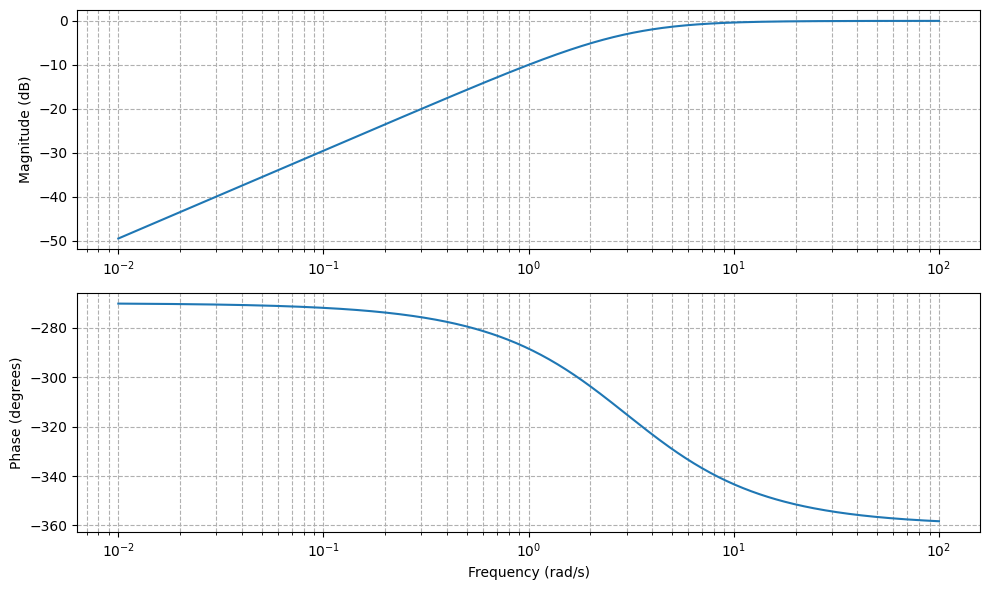

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = s / (s + 3)
G = ctl.TransferFunction([1, 0], [1, 3])

# Define frequency range (rad/s)
omega = np.logspace(-2, 2, 500)

# Compute Bode response (returns mag in abs, phase in rad)
mag, phase_rad, omega = ctl.bode(G, omega, dB=False, deg=False, plot=False)

# Convert to dB and degrees
mag_db = 20 * np.log10(mag)
phase_deg = np.degrees(phase_rad)

# Plot
plt.figure(figsize=(10, 6))

# Magnitude
plt.subplot(2, 1, 1)
plt.semilogx(omega, mag_db)
plt.ylabel("Magnitude (dB)")
plt.grid(True, which="both", linestyle="--")

# Phase
plt.subplot(2, 1, 2)
plt.semilogx(omega, phase_deg)
plt.ylabel("Phase (degrees)")
plt.xlabel("Frequency (rad/s)")
plt.grid(True, which="both", linestyle="--")

plt.tight_layout()
plt.savefig("HW4_Q2_Bode2", dpi=300, bbox_inches='tight')

plt.show()


C:\Users\Omri\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\freqplot.py:1799: FutureWarning: nyquist_plot() return value of count[, contour] is deprecated; use nyquist_response()
  warnings.warn(


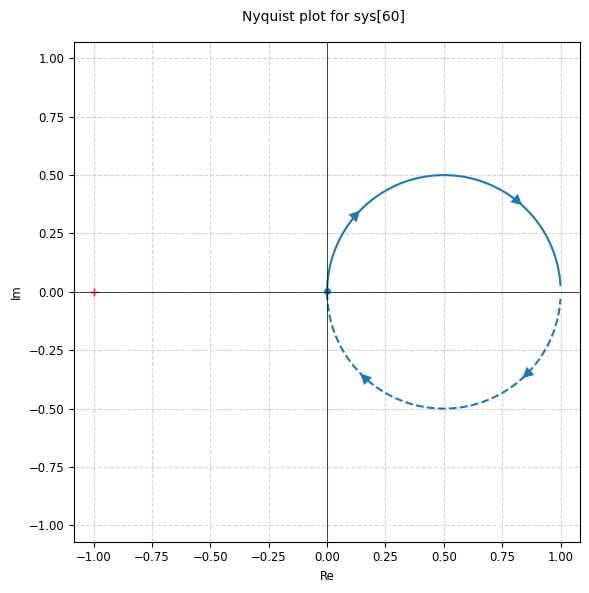

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = s / (s + 3)
G = ctl.TransferFunction([1, 0], [1, 3])

# Create figure
plt.figure(figsize=(6, 6))

# Plot Nyquist curve
ctl.nyquist_plot(G, omega=np.logspace(-2, 2, 1000), plot=True)

# Remove auto title
plt.gca().set_title("")

# Add axis lines
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)

# Labels and formatting
plt.xlabel("Re")
plt.ylabel("Im")
plt.grid(True, which="both", linestyle="--")
plt.axis("equal")

plt.tight_layout()
plt.savefig("HW4_Q2_Nyquist2", dpi=300, bbox_inches='tight')

plt.show()


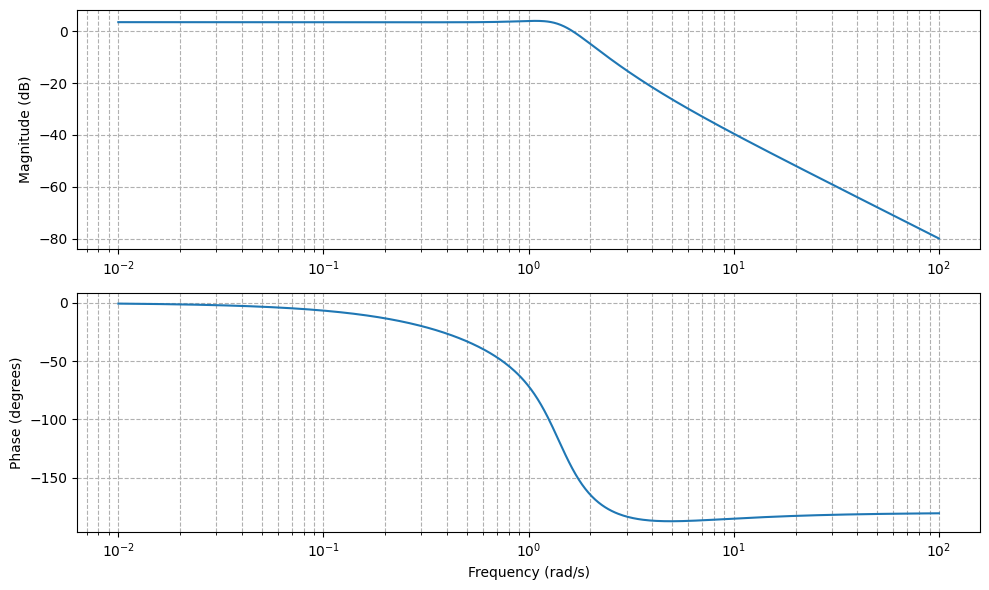

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = (s + 3) / ((s + 1)(s^2 + s + 2))
numerator = [1, 3]
denominator = np.polymul([1, 1], [1, 1, 2])  # (s+1)(s^2 + s + 2)
G = ctl.TransferFunction(numerator, denominator)

# Frequency range
omega = np.logspace(-2, 2, 500)

# Compute Bode response (magnitude and phase)
mag, phase_rad, omega = ctl.bode(G, omega, dB=False, deg=False, plot=False)

# Convert to dB and degrees
mag_db = 20 * np.log10(mag)
phase_deg = np.degrees(phase_rad)

# Plot
plt.figure(figsize=(10, 6))

# Magnitude plot
plt.subplot(2, 1, 1)
plt.semilogx(omega, mag_db)
plt.ylabel("Magnitude (dB)")
plt.grid(True, which="both", linestyle="--")

# Phase plot
plt.subplot(2, 1, 2)
plt.semilogx(omega, phase_deg)
plt.ylabel("Phase (degrees)")
plt.xlabel("Frequency (rad/s)")
plt.grid(True, which="both", linestyle="--")

plt.tight_layout()
plt.savefig("HW4_Q2_Bode3", dpi=300, bbox_inches='tight')

plt.show()


C:\Users\Omri\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\freqplot.py:1799: FutureWarning: nyquist_plot() return value of count[, contour] is deprecated; use nyquist_response()
  warnings.warn(
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


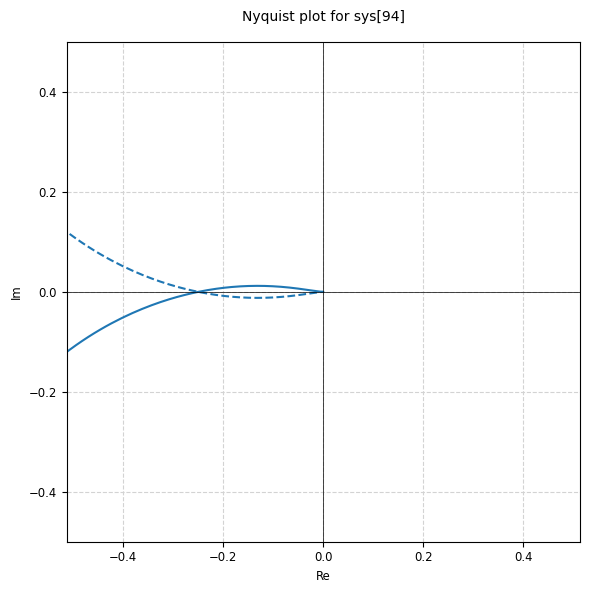

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define transfer function G(s) = (s + 3) / ((s + 1)(s^2 + s + 2))
numerator = [1, 3]
denominator = np.polymul([1, 1], [1, 1, 2])  # (s+1)(s^2 + s + 2)
G = ctl.TransferFunction(numerator, denominator)

# Create figure
plt.figure(figsize=(6, 6))

# Nyquist plot (with frequency range)
ctl.nyquist_plot(G, omega=np.logspace(-2, 2, 1000), plot=True)

# Clean up plot appearance
plt.gca().set_title("")  # remove default title
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True, which="both", linestyle='--')
plt.xlabel("Re")
plt.ylabel("Im")
plt.axis("equal")

# Zoom in on origin
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)

plt.tight_layout()
plt.savefig("HW4_Q2_Nyquist3", dpi=300, bbox_inches='tight')

plt.show()


C:\Users\Omri\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


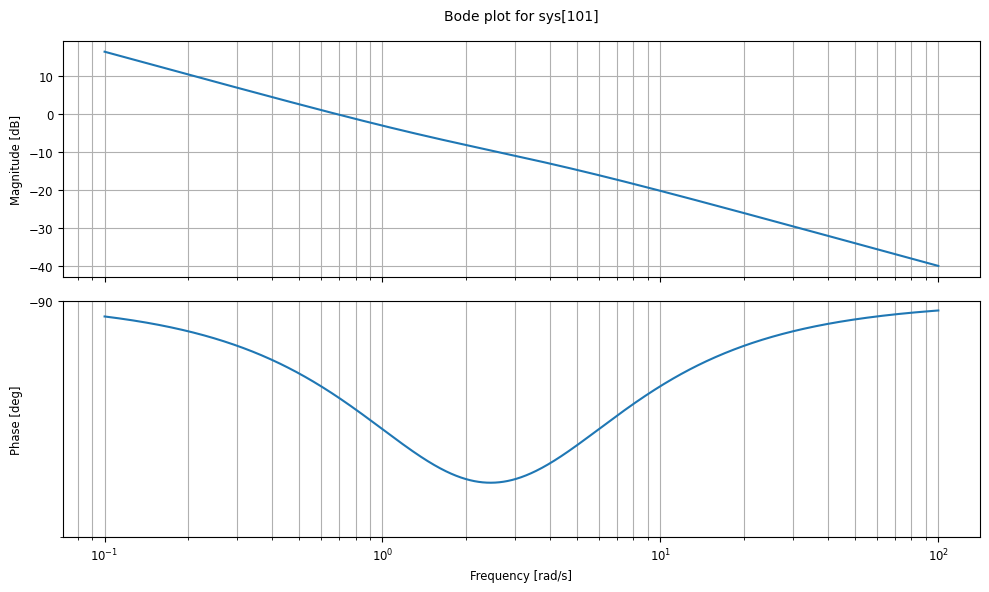

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = (s - 2) / (s(s - 3))
numerator = [1, -2]
denominator = [1, -3, 0]  # s(s - 3) = s^2 - 3s

G = ctl.TransferFunction(numerator, denominator)

# Generate Bode plot
plt.figure(figsize=(10, 6))
mag, phase, omega = ctl.bode_plot(G, dB=True, deg=True, omega=np.logspace(-1, 2, 1000), plot=True)

# Clean up plot layout
plt.tight_layout()
plt.savefig("HW4_Q2_Bode4", dpi=300, bbox_inches='tight')

plt.show()


C:\Users\Omri\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\freqplot.py:1454: UserWarning: number of encirclements was a non-integer value; this can happen is contour is not closed, possibly based on a frequency range that does not include zero.
  warnings.warn(
C:\Users\Omri\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\freqplot.py:1799: FutureWarning: nyquist_plot() return value of count[, contour] is deprecated; use nyquist_response()
  warnings.warn(


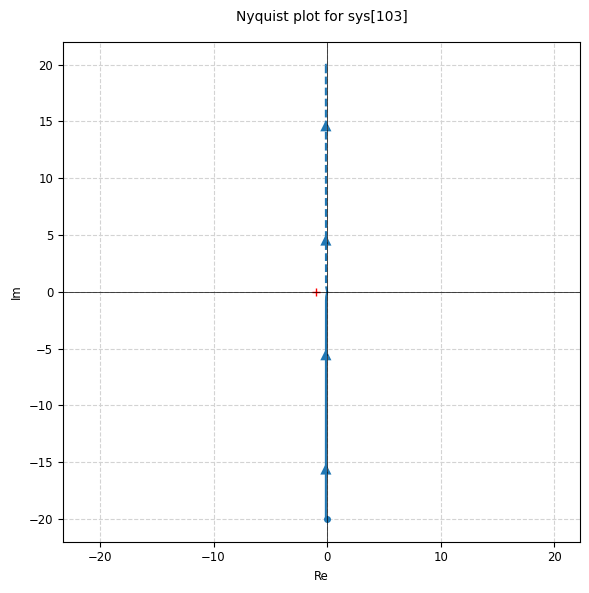

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function
numerator = [1, -2]
denominator = [1, -3, 0]  # s(s - 3) = s^2 - 3s
G = ctl.TransferFunction(numerator, denominator)

# Create figure
plt.figure(figsize=(6, 6))

# Generate Nyquist plot over frequency range
ctl.nyquist_plot(G, omega=np.logspace(-2, 2, 1000), plot=True)

# Clean up plot appearance
plt.gca().set_title("")  # Remove default title
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True, which="both", linestyle='--')
plt.xlabel("Re")
plt.ylabel("Im")
plt.axis("equal")

plt.tight_layout()
plt.show()


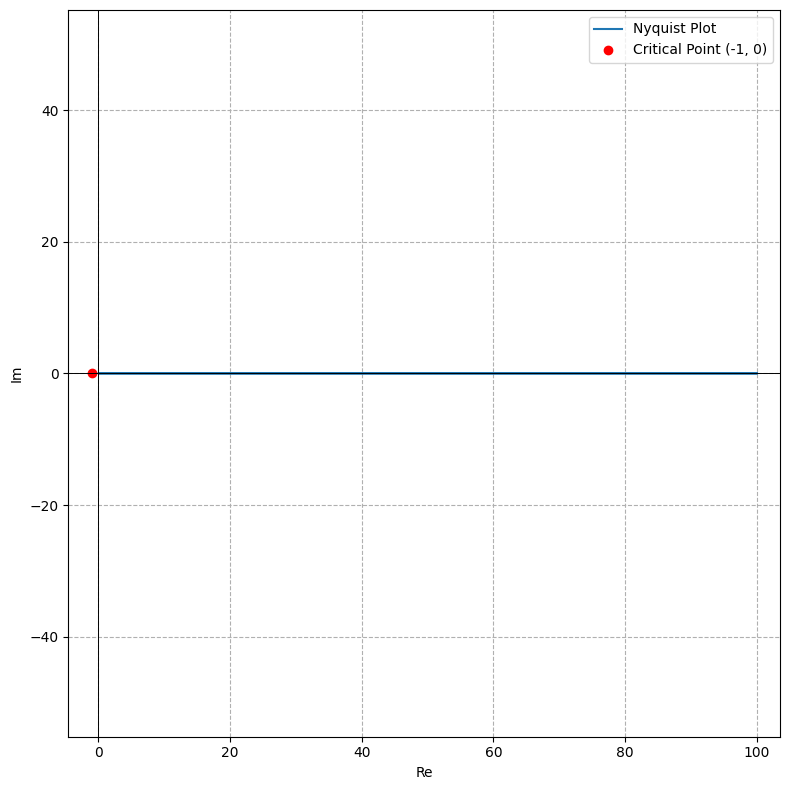

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function G(s) = (s - 2)/(s(s - 3))
numerator = [1, -2]
denominator = [1, -3, 0]  # s^2 - 3s
G = ctl.TransferFunction(numerator, denominator)

# Frequency range for positive omega
omega = np.logspace(-2, 2, 2000)

# Compute frequency response
_, _, H = ctl.frequency_response(G, omega)
H = H.flatten()

# Reflect for negative frequencies (mirror)
H_mirror = np.conj(H[::-1])
H_full = np.concatenate((H_mirror, H))

# Plot Nyquist
plt.figure(figsize=(8, 8))
plt.plot(np.real(H_full), np.imag(H_full), label="Nyquist Plot")
plt.plot(-1, 0, 'ro', label='Critical Point (-1, 0)')

# Axis lines and styling
plt.axhline(0, color='black', lw=0.7)
plt.axvline(0, color='black', lw=0.7)
plt.xlabel("Re")
plt.ylabel("Im")
plt.grid(True, which="both", linestyle="--")
plt.axis("equal")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Omri\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


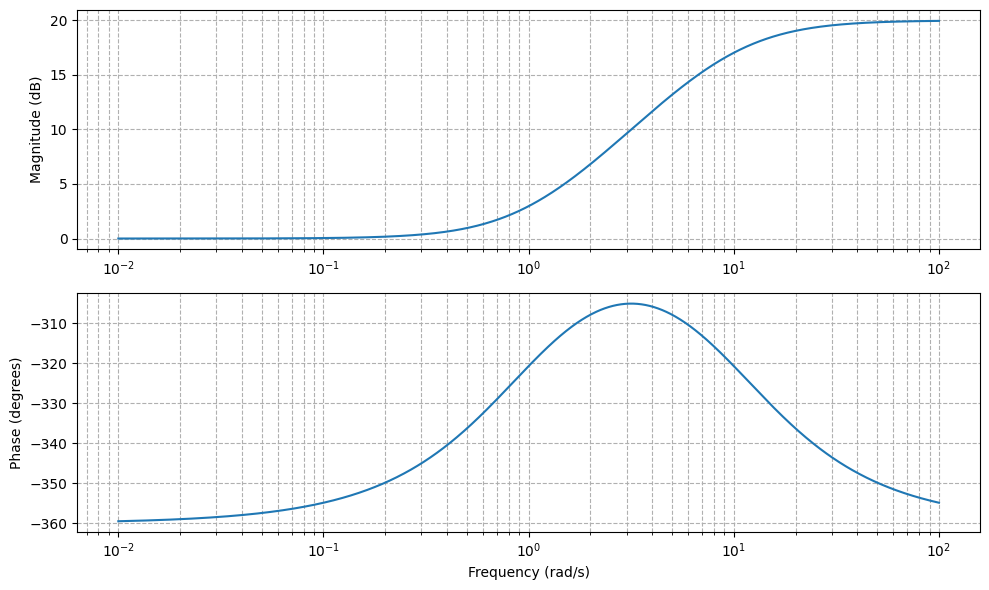

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Parameters
alpha = 0.1   # must be < 1
tau = 1       # must be > 0

# Transfer function C(s) = (1 + τs) / (1 + ατs)
num = [tau, 1]
den = [alpha * tau, 1]
C = ctl.TransferFunction(num, den)

# Frequency range (logarithmic)
omega = np.logspace(-2, 2, 1000)

# Compute frequency response
mag, phase, omega = ctl.bode_plot(C, omega, dB=True, deg=True, plot=False)

# Plot magnitude (in dB)
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.semilogx(omega, 20 * np.log10(mag))
plt.ylabel("Magnitude (dB)")
plt.grid(True, which="both", linestyle="--")

# Plot phase (in degrees)
plt.subplot(2, 1, 2)
plt.semilogx(omega, phase * 180 / np.pi)
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Phase (degrees)")
plt.grid(True, which="both", linestyle="--")

plt.tight_layout()
plt.show()


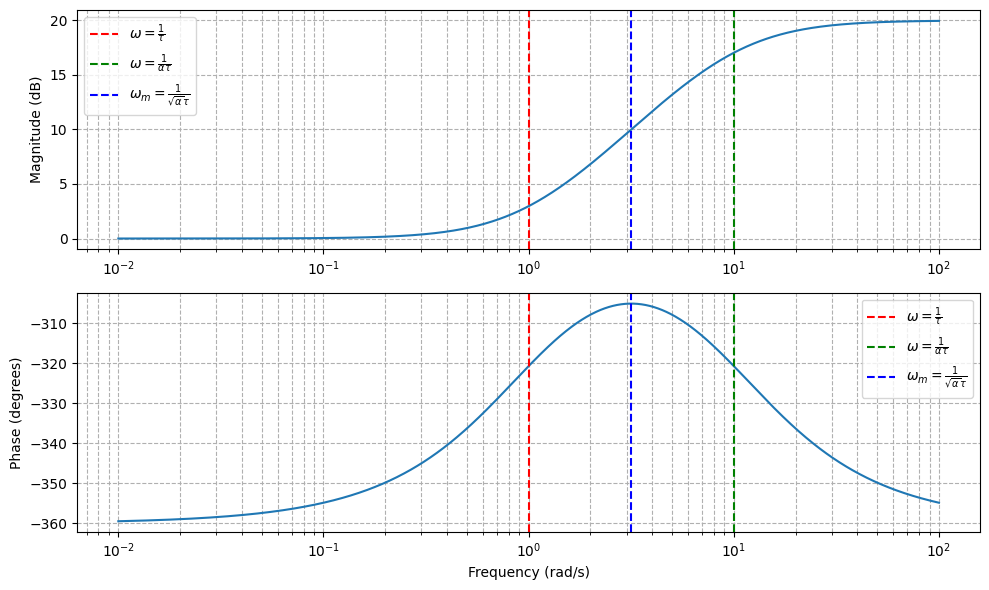

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Parameters
alpha = 0.1   # 0 < alpha < 1
tau = 1       # tau > 0

# Define the lead compensator C(s) = (1 + τs) / (1 + ατs)
num = [tau, 1]
den = [alpha * tau, 1]
C = ctl.TransferFunction(num, den)

# Critical frequencies
w1 = 1 / tau
w2 = 1 / (alpha * tau)
wm = 1 / (np.sqrt(alpha) * tau)  # frequency of max phase lead

# Frequency range
omega = np.logspace(-2, 2, 1000)

# Compute response
mag, phase, omega = ctl.bode_plot(C, omega, dB=True, deg=True, plot=False)

# Plot
plt.figure(figsize=(10, 6))

# Magnitude plot
plt.subplot(2, 1, 1)
plt.semilogx(omega, 20 * np.log10(mag))
plt.axvline(w1, color='red', linestyle='--', label=r'$\omega = \frac{1}{\tau}$')
plt.axvline(w2, color='green', linestyle='--', label=r'$\omega = \frac{1}{\alpha\tau}$')
plt.axvline(wm, color='blue', linestyle='--', label=r'$\omega_m = \frac{1}{\sqrt{\alpha}\tau}$')
plt.ylabel("Magnitude (dB)")
plt.grid(True, which="both", linestyle="--")
plt.legend()

# Phase plot
plt.subplot(2, 1, 2)
plt.semilogx(omega, phase * 180 / np.pi)
plt.axvline(w1, color='red', linestyle='--', label=r'$\omega = \frac{1}{\tau}$')
plt.axvline(w2, color='green', linestyle='--', label=r'$\omega = \frac{1}{\alpha\tau}$')
plt.axvline(wm, color='blue', linestyle='--', label=r'$\omega_m = \frac{1}{\sqrt{\alpha}\tau}$')
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Phase (degrees)")
plt.grid(True, which="both", linestyle="--")
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Omri\AppData\Local\Temp\ipykernel_21144\2990972773.py:43: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


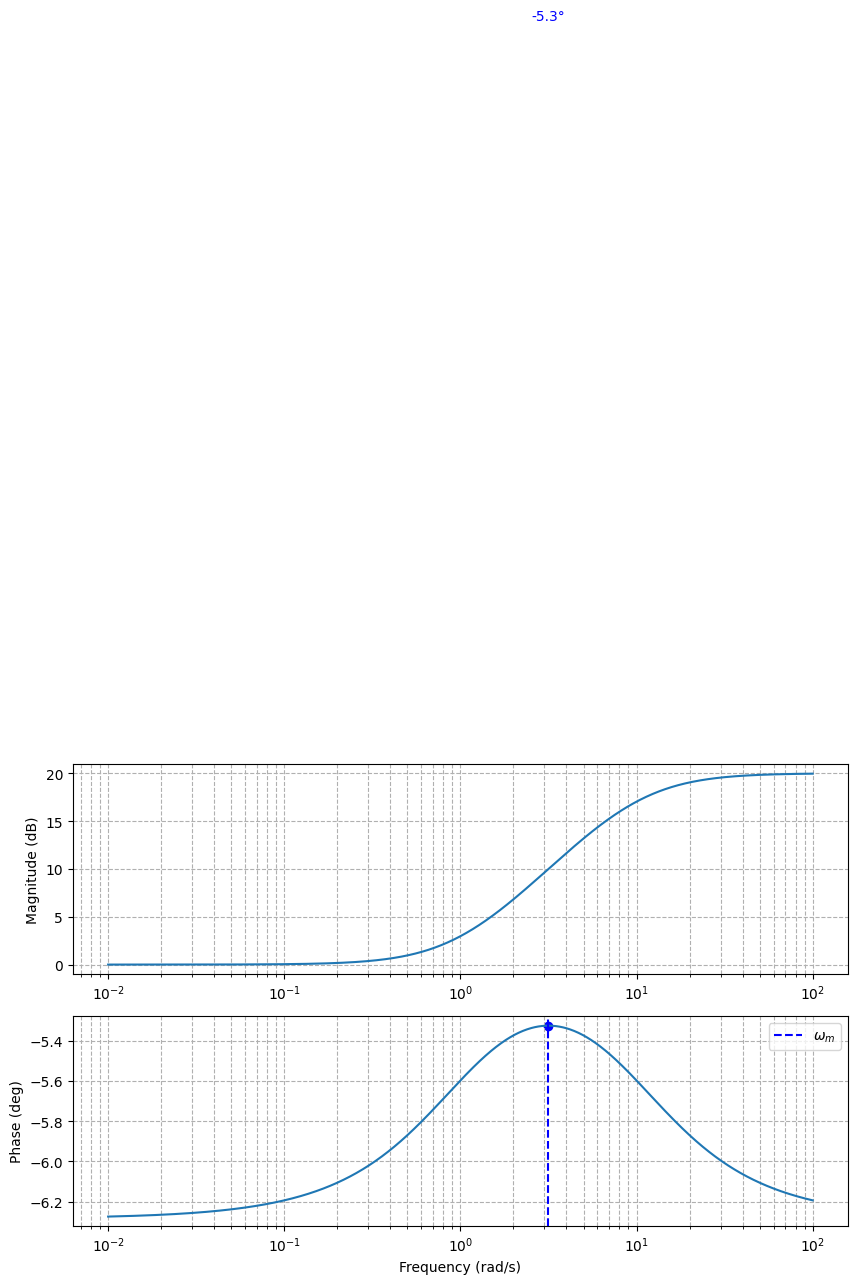

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Parameters for lead compensator
alpha = 0.1
tau = 1

# Define transfer function C(s) = (1 + τs) / (1 + ατs)
C = ctl.TransferFunction([tau, 1], [alpha * tau, 1])

# Frequency range
omega = np.logspace(-2, 2, 1000)

# Compute magnitude and phase (in degrees)
mag, phase, omega = ctl.bode_plot(C, omega, dB=True, deg=True, plot=False)

# Find the maximum phase and its frequency
max_phase_idx = np.argmax(phase)
omega_m = omega[max_phase_idx]
phi_m = phase[max_phase_idx]

# Plot
plt.figure(figsize=(10, 6))

# Magnitude plot
plt.subplot(2, 1, 1)
plt.semilogx(omega, 20 * np.log10(mag))
plt.ylabel("Magnitude (dB)")
plt.grid(True, which="both", linestyle="--")

# Phase plot
plt.subplot(2, 1, 2)
plt.semilogx(omega, phase)
plt.axvline(omega_m, color='blue', linestyle='--', label=r'$\omega_m$')
plt.scatter(omega_m, phi_m, color='blue')
plt.text(omega_m, phi_m + 5, f"{phi_m:.1f}°", color='blue', ha='center')
plt.ylabel("Phase (deg)")
plt.xlabel("Frequency (rad/s)")
plt.grid(True, which="both", linestyle="--")
plt.legend()

plt.tight_layout()
plt.show()


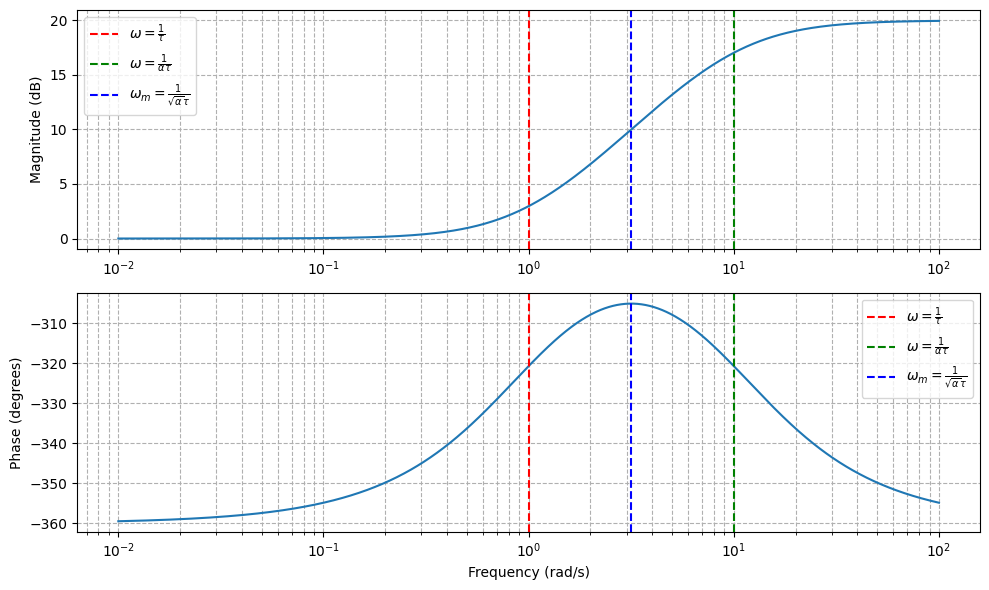

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Parameters
alpha = 0.1   # 0 < alpha < 1
tau = 1       # tau > 0

# Define the lead compensator C(s) = (1 + τs) / (1 + ατs)
num = [tau, 1]
den = [alpha * tau, 1]
C = ctl.TransferFunction(num, den)

# Critical frequencies
w1 = 1 / tau
w2 = 1 / (alpha * tau)
wm = 1 / (np.sqrt(alpha) * tau)  # frequency of max phase lead

# Frequency range
omega = np.logspace(-2, 2, 1000)

# Compute response
mag, phase, omega = ctl.bode_plot(C, omega, dB=True, deg=True, plot=False)

# Plot
plt.figure(figsize=(10, 6))

# Magnitude plot
plt.subplot(2, 1, 1)
plt.semilogx(omega, 20 * np.log10(mag))
plt.axvline(w1, color='red', linestyle='--', label=r'$\omega = \frac{1}{\tau}$')
plt.axvline(w2, color='green', linestyle='--', label=r'$\omega = \frac{1}{\alpha\tau}$')
plt.axvline(wm, color='blue', linestyle='--', label=r'$\omega_m = \frac{1}{\sqrt{\alpha}\tau}$')
plt.ylabel("Magnitude (dB)")
plt.grid(True, which="both", linestyle="--")
plt.legend()

# Phase plot
plt.subplot(2, 1, 2)
plt.semilogx(omega, phase * 180 / np.pi)
plt.axvline(w1, color='red', linestyle='--', label=r'$\omega = \frac{1}{\tau}$')
plt.axvline(w2, color='green', linestyle='--', label=r'$\omega = \frac{1}{\alpha\tau}$')
plt.axvline(wm, color='blue', linestyle='--', label=r'$\omega_m = \frac{1}{\sqrt{\alpha}\tau}$')
plt.xlabel("Frequency (rad/s)")
plt.ylabel("Phase (degrees)")
plt.grid(True, which="both", linestyle="--")
plt.legend()

plt.tight_layout()
plt.savefig("Lead_Compensator", dpi=300, bbox_inches='tight')

plt.show()


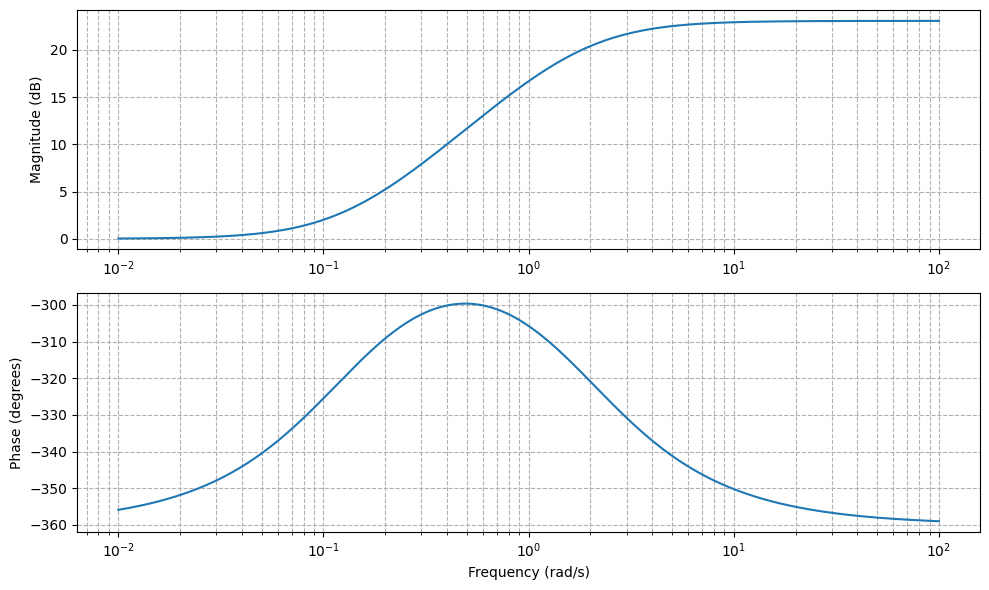

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define transfer function
numerator = [7.7, 1]
denominator = [0.54, 1]
C = ctl.TransferFunction(numerator, denominator)

# Frequency range
omega = np.logspace(-2, 2, 1000)

# Compute magnitude and phase
mag, phase, omega = ctl.bode_plot(C, omega=omega, dB=True, deg=True, plot=False)

# Plot results manually
plt.figure(figsize=(10, 6))

# Magnitude plot
plt.subplot(2, 1, 1)
plt.semilogx(omega, 20 * np.log10(mag))
plt.ylabel("Magnitude (dB)")
plt.grid(True, which="both", linestyle="--")

# Phase plot
plt.subplot(2, 1, 2)
plt.semilogx(omega, phase * 180 / np.pi)
plt.ylabel("Phase (degrees)")
plt.xlabel("Frequency (rad/s)")
plt.grid(True, which="both", linestyle="--")

plt.tight_layout()
plt.savefig("LEADCONTROLLER", dpi=300, bbox_inches='tight')

plt.show()


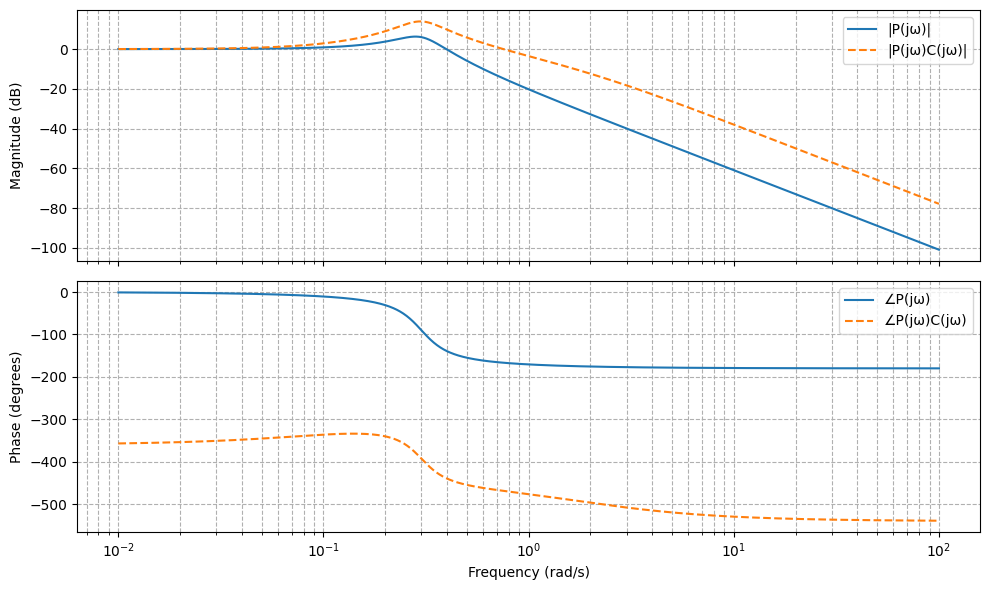

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define transfer functions
P = ctl.TransferFunction([0.09], [1, 0.15, 0.09])
PC = ctl.TransferFunction([0.693, 0.09], [0.54, 1.081, 0.1986, 0.09])

# Frequency range
omega = np.logspace(-2, 2, 1000)

# Bode plots (disable internal plotting)
mag_P, phase_P, _ = ctl.bode_plot(P, omega=omega, dB=False, deg=False, plot=False)
mag_PC, phase_PC, _ = ctl.bode_plot(PC, omega=omega, dB=False, deg=False, plot=False)

# Convert magnitude to dB, phase to degrees
mag_P_dB = 20 * np.log10(mag_P)
mag_PC_dB = 20 * np.log10(mag_PC)
phase_P_deg = np.degrees(phase_P)
phase_PC_deg = np.degrees(phase_PC)

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

ax1.semilogx(omega, mag_P_dB, label='|P(jω)|')
ax1.semilogx(omega, mag_PC_dB, label='|P(jω)C(jω)|', linestyle='--')
ax1.set_ylabel("Magnitude (dB)")
ax1.grid(True, which="both", linestyle="--")
ax1.legend()

ax2.semilogx(omega, phase_P_deg, label='∠P(jω)')
ax2.semilogx(omega, phase_PC_deg, label='∠P(jω)C(jω)', linestyle='--')
ax2.set_ylabel("Phase (degrees)")
ax2.set_xlabel("Frequency (rad/s)")
ax2.grid(True, which="both", linestyle="--")
ax2.legend()

plt.tight_layout()
plt.show()


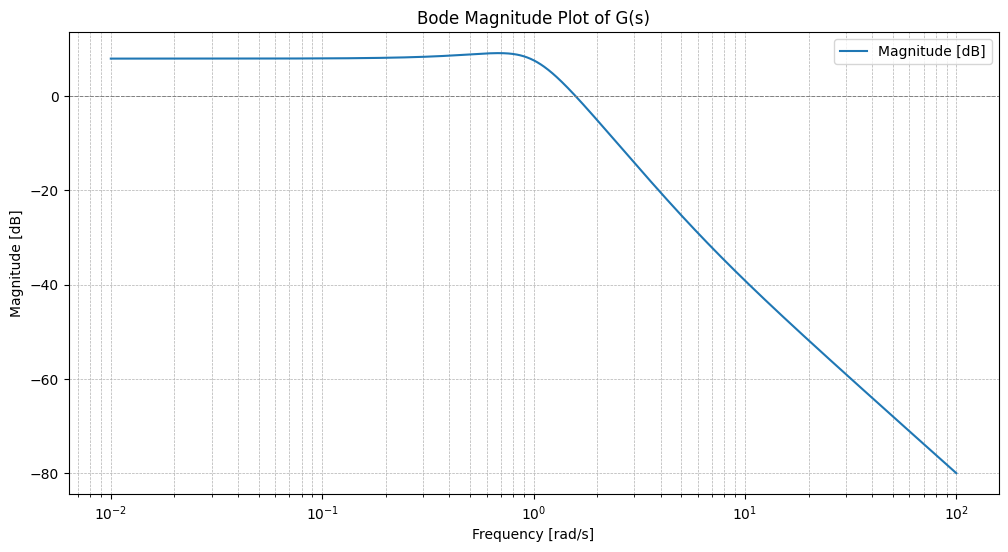

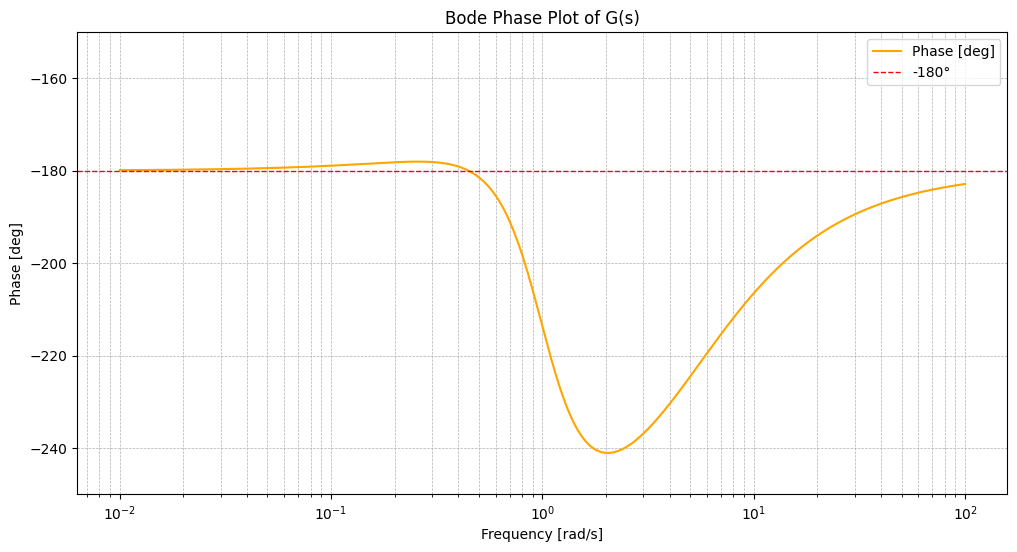

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define numerator and denominator
numerator = np.polymul([1, 1], [1, 5])              # (s+1)(s+5)
denominator = np.polymul([1, 0, -2], [1, 1, 1])     # (s^2 - 2)(s^2 + s + 1)

# Define transfer function
G = ctl.TransferFunction(numerator, denominator)

# Frequency range
omega = np.logspace(-2, 2, 1000)

# Bode plot
mag, phase, omega = ctl.bode(G, omega, dB=True, deg=True, plot=False)

# Plot magnitude
plt.figure(figsize=(12, 6))
plt.semilogx(omega, 20 * np.log10(mag), label='Magnitude [dB]')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.title('Bode Magnitude Plot of G(s)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

# Plot phase
plt.figure(figsize=(12, 6))
plt.semilogx(omega, phase * (180 / np.pi), label='Phase [deg]', color='orange')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axhline(-180, color='red', linestyle='--', linewidth=1, label='-180°')
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [deg]')
plt.title('Bode Phase Plot of G(s)')
plt.ylim([-250, -150])  # <-- Set y-axis limits here
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.show()


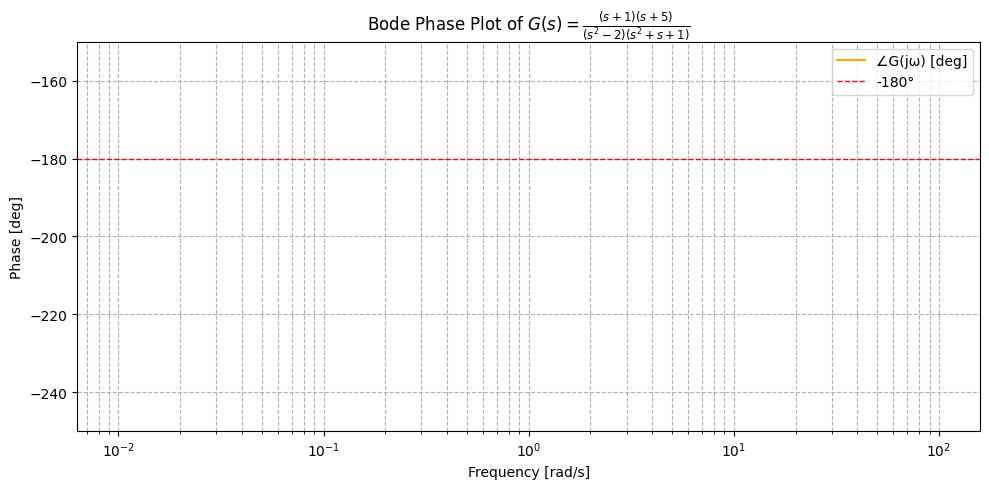

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define G(s) = ((s+1)(s+5))/((s^2-2)(s^2+s+1))
numerator = np.polymul([1, 1], [1, 5])  # (s+1)(s+5)
denominator = np.polymul([1, 0, -2], [1, 1, 1])  # (s^2 - 2)(s^2 + s + 1)
G = ctl.TransferFunction(numerator, denominator)

# Frequency range
omega = np.logspace(-2, 2, 1000)

# Bode data
mag, phase, omega = ctl.bode(G, omega, dB=True, deg=True, plot=False)

# Plot phase
plt.figure(figsize=(10, 5))
plt.semilogx(omega, phase, label='∠G(jω) [deg]', color='orange')
plt.axhline(-180, color='red', linestyle='--', linewidth=1, label='-180°')
plt.ylim([-250, -150])
plt.title("Bode Phase Plot of $G(s) = \\frac{(s+1)(s+5)}{(s^2 - 2)(s^2 + s + 1)}$")
plt.xlabel("Frequency [rad/s]")
plt.ylabel("Phase [deg]")
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()


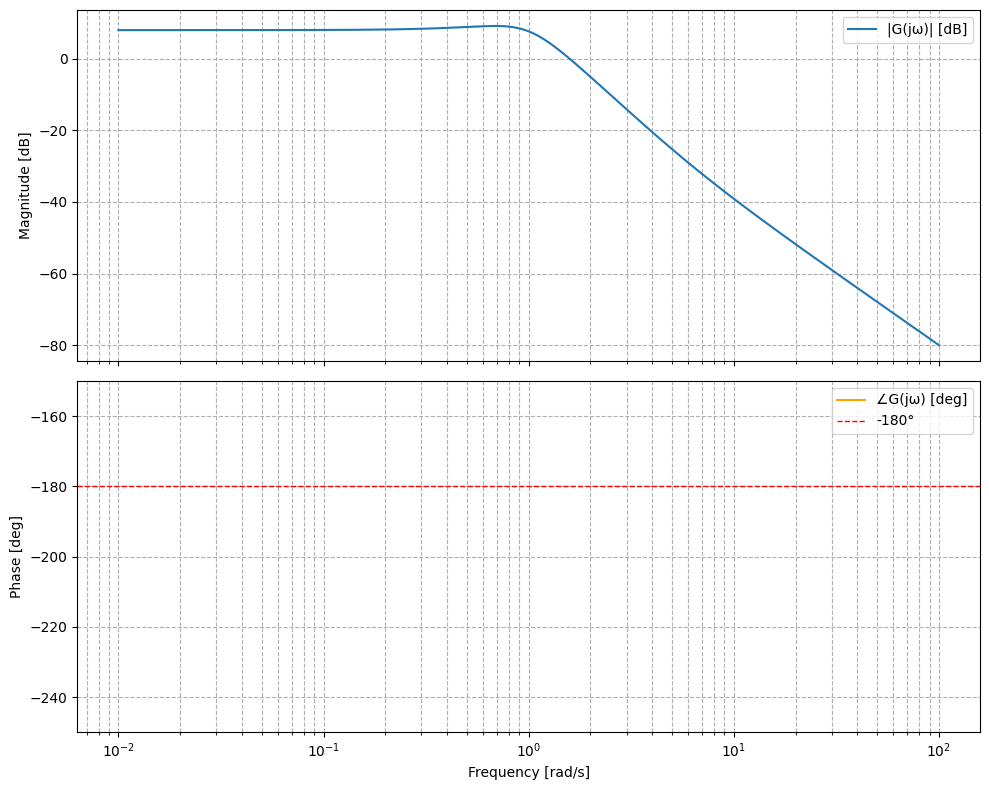

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define the transfer function
numerator = np.polymul([1, 1], [1, 5])  # (s+1)(s+5)
denominator = np.polymul([1, 0, -2], [1, 1, 1])  # (s^2 - 2)(s^2 + s + 1)
G = ctl.TransferFunction(numerator, denominator)

# Frequency range
omega = np.logspace(-2, 2, 1000)

# Get magnitude and phase data
mag, phase, omega = ctl.bode(G, omega, dB=True, deg=True, plot=False)

# Plot magnitude and phase
fig, (ax_mag, ax_phase) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Magnitude plot
ax_mag.semilogx(omega, 20 * np.log10(mag), label='|G(jω)| [dB]')
ax_mag.set_ylabel("Magnitude [dB]")
ax_mag.grid(True, which="both", ls="--")
ax_mag.legend()

# Phase plot
ax_phase.semilogx(omega, phase, label='∠G(jω) [deg]', color='orange')
ax_phase.axhline(-180, color='red', linestyle='--', linewidth=1, label='-180°')
ax_phase.set_ylabel("Phase [deg]")
ax_phase.set_xlabel("Frequency [rad/s]")
ax_phase.set_ylim([-250, -150])
ax_phase.grid(True, which="both", ls="--")
ax_phase.legend()

plt.tight_layout()
plt.show()


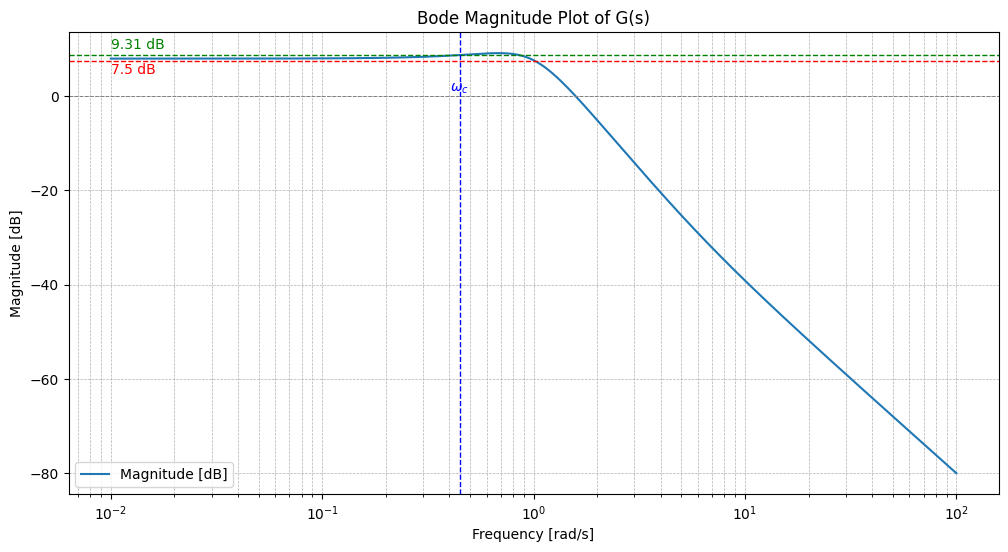

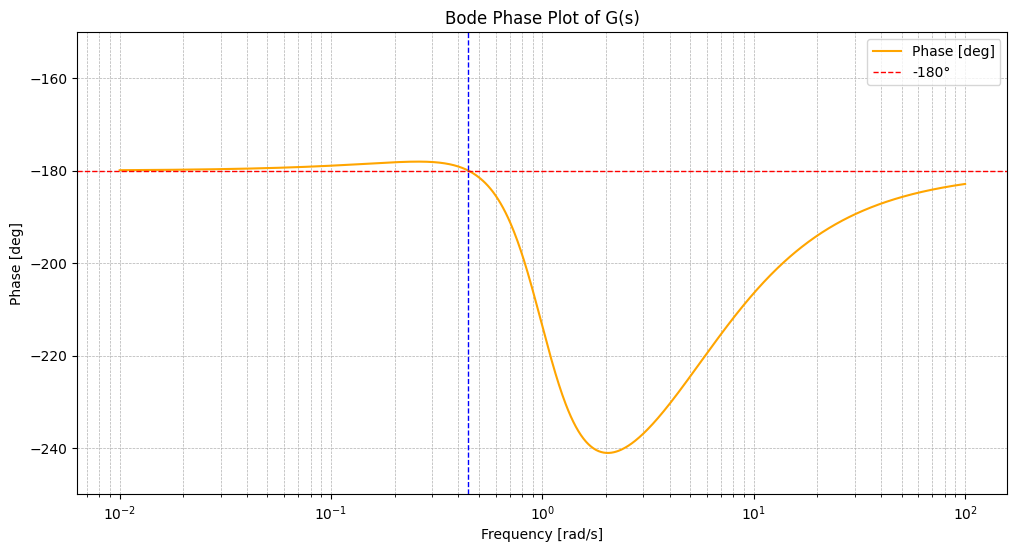

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Define numerator and denominator
numerator = np.polymul([1, 1], [1, 5])              # (s+1)(s+5)
denominator = np.polymul([1, 0, -2], [1, 1, 1])     # (s^2 - 2)(s^2 + s + 1)

# Define transfer function
G = ctl.TransferFunction(numerator, denominator)

# Frequency range
omega = np.logspace(-2, 2, 1000)

# Bode plot
mag, phase, omega = ctl.bode(G, omega, dB=True, deg=True, plot=False)

# Plot magnitude
# Plot magnitude
plt.figure(figsize=(12, 6))
plt.semilogx(omega, 20 * np.log10(mag), label='Magnitude [dB]')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)

# Add magnitude at ω → 0
#omega_0 = 1e-3
#_, mag_0, _ = ctl.freqresp(G, [omega_0])
#mag_0_db = 20 * np.log10(abs(mag_0)).item()

#plt.scatter([omega_0], [mag_0_db], color='red', zorder=5)
#plt.text(omega_0, mag_0_db + 3, f'{mag_0_db:.2f} dB', color='red', ha='center')

# Add horizontal line at 9.94 dB
plt.axhline(7.5, color='red', linestyle='--', linewidth=1)
plt.text(omega[0], 4.2, '7.5 dB', color='red', va='bottom', ha='left')

plt.axhline(8.71, color='green', linestyle='--', linewidth=1)
plt.text(omega[0], 9.31, '9.31 dB', color='green', va='bottom', ha='left')

# Vertical line at ω_c
plt.axvline(omega_c, color='blue', linestyle='--', linewidth=1)
plt.text(omega_c, 0, r'$\omega_c$', color='blue', va='bottom', ha='center')

plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.title('Bode Magnitude Plot of G(s)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig("Bode_For_Recitation_2", dpi=300, bbox_inches='tight')

# Plot phase
plt.figure(figsize=(12, 6))
plt.semilogx(omega, phase * (180 / np.pi), label='Phase [deg]', color='orange')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axhline(-180, color='red', linestyle='--', linewidth=1, label='-180°')

# Vertical line at ω_c
plt.axvline(omega_c, color='blue', linestyle='--', linewidth=1)
#plt.text(omega_c, 0, r'$\omega_c$', color='blue', va='bottom', ha='center')

plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [deg]')
plt.title('Bode Phase Plot of G(s)')
plt.ylim([-250, -150])  # <-- Set y-axis limits here
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.savefig("Bode_For_Recitation", dpi=300, bbox_inches='tight')

plt.show()


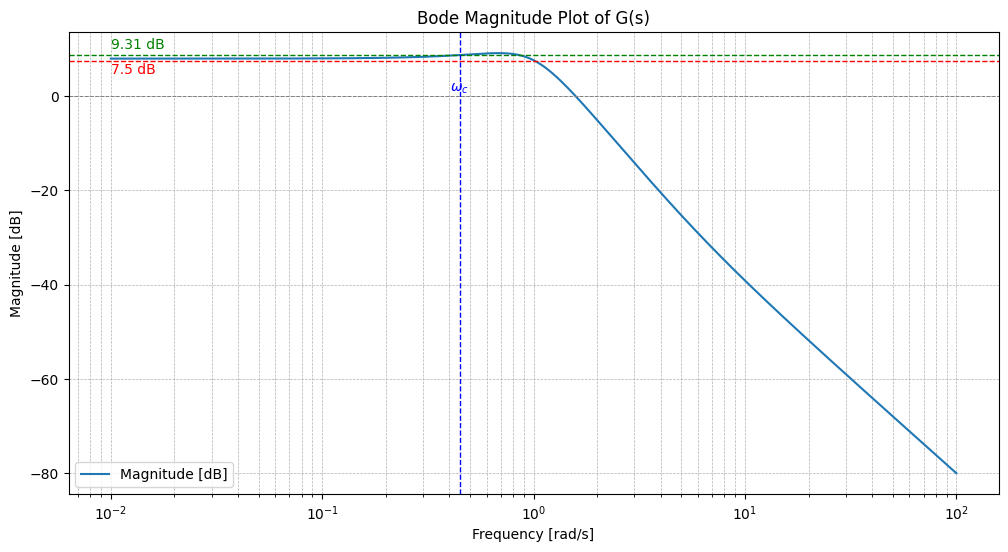

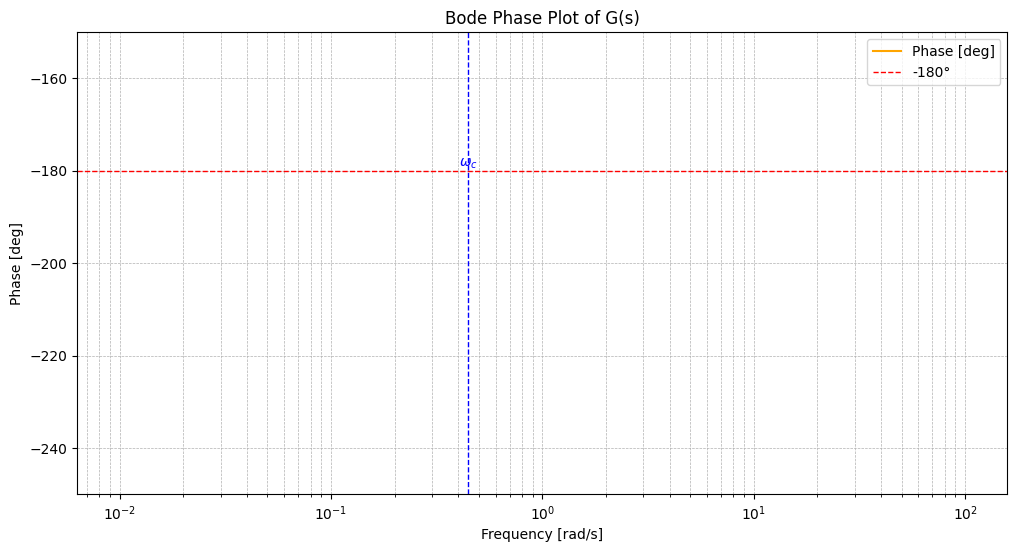

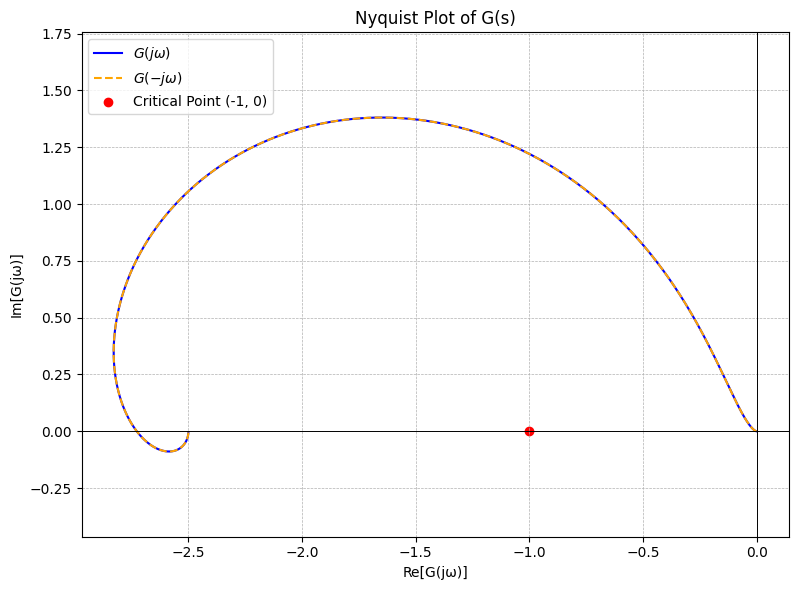

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqs

# Define the numerator and denominator of G(s)
numerator = np.polymul([1, 1], [1, 5])              # (s+1)(s+5)
denominator = np.polymul([1, 0, -2], [1, 1, 1])     # (s^2 - 2)(s^2 + s + 1)

# Frequency range (rad/s)
omega = np.logspace(-2, 2, 10000)

# Frequency response for positive frequencies
_, h_pos = freqs(numerator, denominator, worN=omega)

# Frequency response for negative frequencies (mirror)
_, h_neg = freqs(numerator, denominator, worN=omega[::-1])

# Plot Nyquist plot
plt.figure(figsize=(8, 6))
plt.plot(h_pos.real, h_pos.imag, label=r'$G(j\omega)$', color='blue')
plt.plot(h_neg.real, h_neg.imag, label=r'$G(-j\omega)$', color='orange', linestyle='--')

# Add critical point (-1, 0)
plt.scatter([-1], [0], color='red', label='Critical Point (-1, 0)')

# Axes formatting
plt.axhline(0, color='black', linewidth=0.7)
plt.axvline(0, color='black', linewidth=0.7)
plt.xlabel('Re[G(jω)]')
plt.ylabel('Im[G(jω)]')
plt.title('Nyquist Plot of G(s)')
plt.axis('equal')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


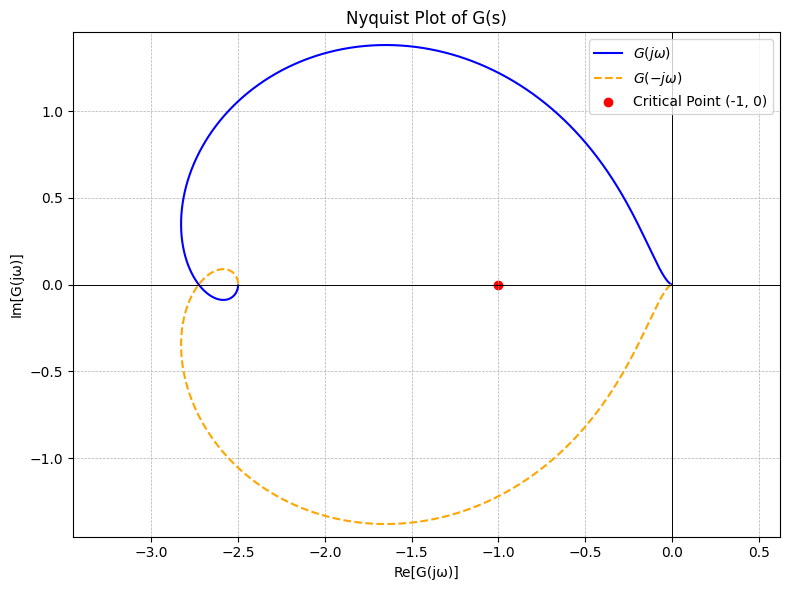

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqs

# Define G(s) = ((s+1)(s+5)) / ((s^2 - 2)(s^2 + s + 1))
numerator = np.polymul([1, 1], [1, 5])              # (s+1)(s+5)
denominator = np.polymul([1, 0, -2], [1, 1, 1])     # (s^2 - 2)(s^2 + s + 1)

# Frequency range (rad/s)
omega = np.logspace(-2, 2, 10000)

# Frequency response for ω > 0
_, h = freqs(numerator, denominator, worN=omega)

# Mirror for ω < 0 using complex conjugate
h_conj = np.conj(h)

# Plot Nyquist plot
plt.figure(figsize=(8, 6))
plt.plot(h.real, h.imag, label=r'$G(j\omega)$', color='blue')
plt.plot(h_conj.real, h_conj.imag, label=r'$G(-j\omega)$', color='orange', linestyle='--')

# Mark the critical point
plt.scatter([-1], [0], color='red', label='Critical Point (-1, 0)')

# Axes and formatting
plt.axhline(0, color='black', linewidth=0.7)
plt.axvline(0, color='black', linewidth=0.7)
plt.xlabel('Re[G(jω)]')
plt.ylabel('Im[G(jω)]')
plt.title('Nyquist Plot of G(s)')
plt.axis('equal')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


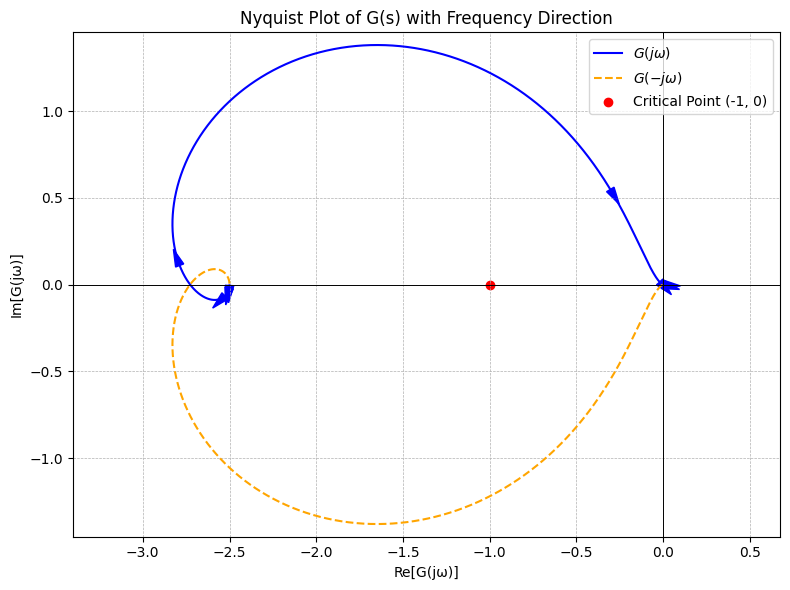

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqs

# Define G(s) = ((s+1)(s+5)) / ((s^2 - 2)(s^2 + s + 1))
numerator = np.polymul([1, 1], [1, 5])              # (s+1)(s+5)
denominator = np.polymul([1, 0, -2], [1, 1, 1])     # (s^2 - 2)(s^2 + s + 1)

# Frequency range (rad/s)
omega = np.logspace(-2, 2, 10000)

# Frequency response for ω > 0
_, h = freqs(numerator, denominator, worN=omega)

# Mirror for ω < 0 using complex conjugate
h_conj = np.conj(h)

# Plot Nyquist plot
plt.figure(figsize=(8, 6))
plt.plot(h.real, h.imag, label=r'$G(j\omega)$', color='blue')
plt.plot(h_conj.real, h_conj.imag, label=r'$G(-j\omega)$', color='orange', linestyle='--')

# Add arrows to indicate direction of increasing ω
arrow_indices = np.linspace(100, len(h) - 100, 8, dtype=int)
for i in arrow_indices:
    dx = h[i + 1].real - h[i].real
    dy = h[i + 1].imag - h[i].imag
    plt.arrow(h[i].real, h[i].imag, dx, dy,
              shape='full', head_width=0.05, head_length=0.1, fc='blue', ec='blue')

# Mark the critical point
plt.scatter([-1], [0], color='red', label='Critical Point (-1, 0)')

# Axes and formatting
plt.axhline(0, color='black', linewidth=0.7)
plt.axvline(0, color='black', linewidth=0.7)
plt.xlabel('Re[G(jω)]')
plt.ylabel('Im[G(jω)]')
plt.title('Nyquist Plot of G(s) with Frequency Direction')
plt.axis('equal')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


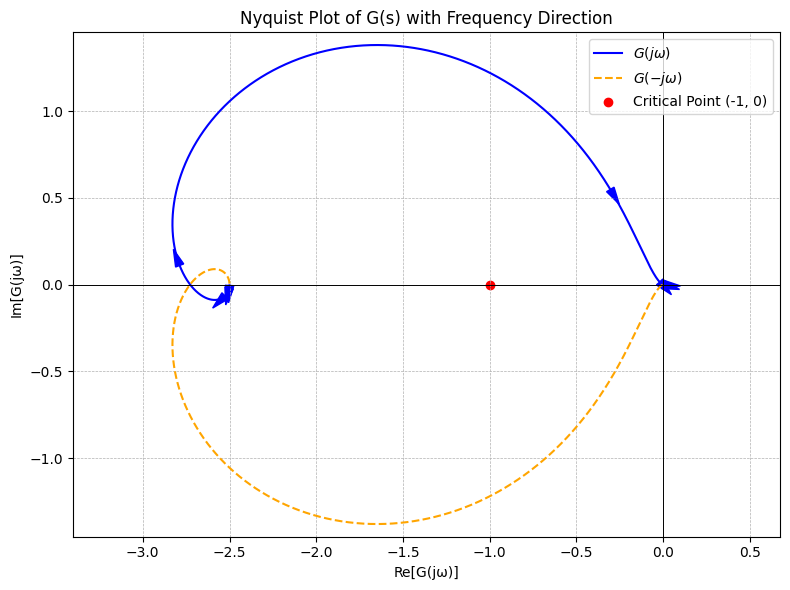

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqs

# Define G(s) = ((s+1)(s+5)) / ((s^2 - 2)(s^2 + s + 1))
numerator = np.polymul([1, 1], [1, 5])              # (s+1)(s+5)
denominator = np.polymul([1, 0, -2], [1, 1, 1])     # (s^2 - 2)(s^2 + s + 1)

# Frequency range (rad/s)
omega = np.logspace(-2, 2, 10000)

# Frequency response for ω > 0
_, h = freqs(numerator, denominator, worN=omega)

# Mirror for ω < 0 using complex conjugate
h_conj = np.conj(h)

# Plot Nyquist plot
plt.figure(figsize=(8, 6))
plt.plot(h.real, h.imag, label=r'$G(j\omega)$', color='blue')
plt.plot(h_conj.real, h_conj.imag, label=r'$G(-j\omega)$', color='orange', linestyle='--')

# Add arrows to indicate direction of increasing ω
arrow_indices = np.linspace(100, len(h) - 100, 8, dtype=int)
for i in arrow_indices:
    dx = h[i + 1].real - h[i].real
    dy = h[i + 1].imag - h[i].imag
    plt.arrow(h[i].real, h[i].imag, dx, dy,
              shape='full', head_width=0.05, head_length=0.1, fc='blue', ec='blue')

# Mark the critical point
plt.scatter([-1], [0], color='red', label='Critical Point (-1, 0)')

# Axes and formatting
plt.axhline(0, color='black', linewidth=0.7)
plt.axvline(0, color='black', linewidth=0.7)
plt.xlabel('Re[G(jω)]')
plt.ylabel('Im[G(jω)]')
plt.title('Nyquist Plot of G(s) with Frequency Direction')
plt.axis('equal')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


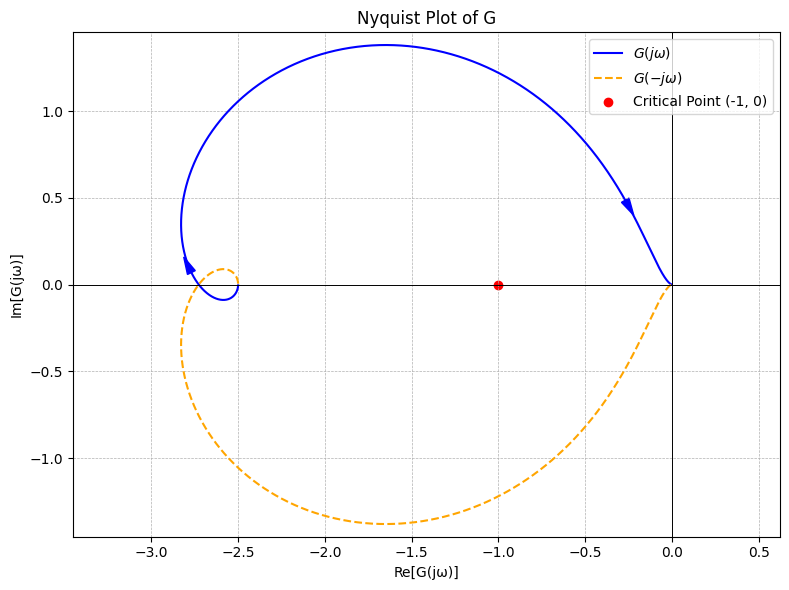

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqs

# Define G(s) = ((s+1)(s+5)) / ((s^2 - 2)(s^2 + s + 1))
numerator = np.polymul([1, 1], [1, 5])
denominator = np.polymul([1, 0, -2], [1, 1, 1])

# Frequency range covering ω = 2 and ω = 4
omega = np.logspace(-2, 2, 10000)
_, h = freqs(numerator, denominator, worN=omega)
h_conj = np.conj(h)

# Find indices closest to ω = 2 and ω = 4
def find_index(omega_array, target):
    return np.argmin(np.abs(omega_array - target))

idx_2 = find_index(omega, 0.5)
idx_4 = find_index(omega, 2)

# Plot Nyquist curve
plt.figure(figsize=(8, 6))
plt.plot(h.real, h.imag, label=r'$G(j\omega)$', color='blue')
plt.plot(h_conj.real, h_conj.imag, label=r'$G(-j\omega)$', color='orange', linestyle='--')

# Add arrows at ω = 2 and ω = 4
for idx in [idx_2, idx_4]:
    dx = h[idx + 1].real - h[idx].real
    dy = h[idx + 1].imag - h[idx].imag
    plt.arrow(h[idx].real, h[idx].imag, dx, dy,
              shape='full', head_width=0.05, head_length=0.1,
              fc='blue', ec='blue')

# Mark the critical point
plt.scatter([-1], [0], color='red', label='Critical Point (-1, 0)')

# Axes and formatting
plt.axhline(0, color='black', linewidth=0.7)
plt.axvline(0, color='black', linewidth=0.7)
plt.xlabel('Re[G(jω)]')
plt.ylabel('Im[G(jω)]')
plt.title('Nyquist Plot of G')
plt.axis('equal')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.savefig("Nyquist_For_Recitation", dpi=300, bbox_inches='tight')

plt.show()


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


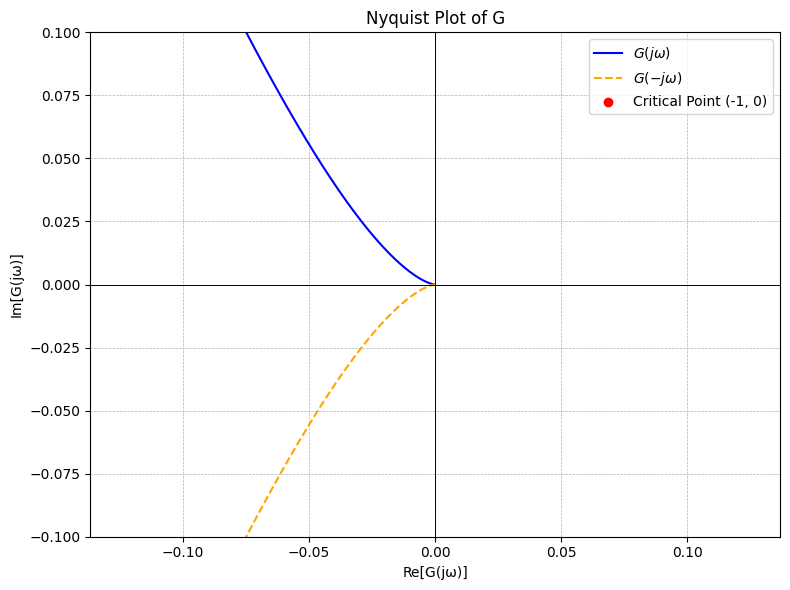

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqs

# Define G(s) = ((s+1)(s+5)) / ((s^2 - 2)(s^2 + s + 1))
numerator = np.polymul([1, 1], [1, 5])
denominator = np.polymul([1, 0, -2], [1, 1, 1])

# Frequency range covering ω = 2 and ω = 4
omega = np.logspace(-2, 2, 10000)
_, h = freqs(numerator, denominator, worN=omega)
h_conj = np.conj(h)

# Find indices closest to ω = 2 and ω = 4
def find_index(omega_array, target):
    return np.argmin(np.abs(omega_array - target))

idx_2 = find_index(omega, 0.5)
idx_4 = find_index(omega, 2)

# Plot Nyquist curve
plt.figure(figsize=(8, 6))
plt.plot(h.real, h.imag, label=r'$G(j\omega)$', color='blue')
plt.plot(h_conj.real, h_conj.imag, label=r'$G(-j\omega)$', color='orange', linestyle='--')

# Add arrows at ω = 2 and ω = 4
for idx in [idx_2, idx_4]:
    dx = h[idx + 1].real - h[idx].real
    dy = h[idx + 1].imag - h[idx].imag
    plt.arrow(h[idx].real, h[idx].imag, dx, dy,
              shape='full', head_width=0.05, head_length=0.1,
              fc='blue', ec='blue')

# Mark the critical point
plt.scatter([-1], [0], color='red', label='Critical Point (-1, 0)')

# Axes and formatting
plt.axhline(0, color='black', linewidth=0.7)
plt.axvline(0, color='black', linewidth=0.7)
plt.xlabel('Re[G(jω)]')
plt.ylabel('Im[G(jω)]')
plt.title('Nyquist Plot of G')
plt.axis('equal')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

# 🔍 Zoom in near the origin
plt.xlim(-0.1, 0.1)     # Adjust as needed
plt.ylim(-0.1, 0.1)

plt.tight_layout()
plt.savefig("Nyquist_For_Recitation", dpi=300, bbox_inches='tight')

plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ipywidgets as widgets
from ipywidgets import interact

# Define the system of ODEs
def system(t, x, a11, a22, b1, b2):
    dx1dt = a11 * x[0] + b1
    dx2dt = a22 * x[1] + b2
    return [dx1dt, dx2dt]

# Define the interactive plot
@interact(a11=widgets.FloatSlider(value=-1, min=-5, max=1, step=0.1, description='a11'),
          a22=widgets.FloatSlider(value=-2, min=-5, max=1, step=0.1, description='a22'),
          b1=widgets.FloatSlider(value=1, min=-5, max=5, step=0.1, description='b1'),
          b2=widgets.FloatSlider(value=2, min=-5, max=5, step=0.1, description='b2'))
def plot_solution(a11, a22, b1, b2):
    # Initial condition
    x0 = [1, 5]
    t_span = (0, 10)
    t_eval = np.linspace(t_span[0], t_span[1], 300)

    # Solve the system
    sol = solve_ivp(system, t_span, x0, t_eval=t_eval, args=(a11, a22, b1, b2))

    # Plot
    plt.figure(figsize=(12, 5))  # Scaled down for Voilà layout
    plt.plot(sol.t, sol.y[0], label='$x_1(t)$')
    plt.plot(sol.t, sol.y[1], label='$x_2(t)$')
    plt.xlabel('Time $t$')
    plt.ylabel('States $x_1$, $x_2$')
    plt.title(r'Solution of $\dot{x} = Ax + b$ with step input $1(t)$')  # ← Raw string here!
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


interactive(children=(FloatSlider(value=-1.0, description='a11', max=1.0, min=-5.0), FloatSlider(value=-2.0, d…